# 1.- Importación de datos

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install boruta

     |████████████████████████████████| 56 kB 2.9 MB/s 


In [ ]:
# Importamos
data = pd.read_csv("insurance_claims.csv") 

# 2.- Descripción de los datos



In [ ]:
# Revisamos los datos
pd.set_option('display.max_columns', None)
data.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip insured_sex insured_education_level insured_occupation  \
0       466132        MALE                      MD       craft-repair   
1       468176        MALE                      MD  machine-op-inspct   
2       430632      FEMALE                     PhD              sales   
3       608117      FEMALE                     PhD       armed-forces   
4       610706        MALE               Associate              sales   

  insured_hobbies insured_relationship  capital-gains  capital-loss  \
0        sleeping              husband          53300             0   
1         reading       other-relative              0             0   
2     board-games            own-child          35100             0   
3     board-games            unmarried          48900        -62400   
4     board-games            unmarried          66000        -46000   

  incident_date             incident_type   collision_type incident_severity  \
0    2015-01-25  Single Vehicle Collision   Side Collision      Major Damage   
1    2015-01-21             Vehicle Theft                ?      Minor Damage   
2    2015-02-22   Multi-vehicle Collision   Rear Collision      Minor Damage   
3    2015-01-10  Single Vehicle Collision  Front Collision      Major Damage   
4    2015-02-17             Vehicle Theft                ?      Minor Damage   

  authorities_contacted incident_state incident_city  incident_location  \
0                Police             SC      Columbus     9935 4th Drive   
1                Police             VA     Riverwood       6608 MLK Hwy   
2                Police             NY      Columbus  7121 Francis Lane   
3                Police             OH     Arlington   6956 Maple Drive   
4                  None             NY     Arlington       3041 3rd Ave   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1               ?   
2                         7                            3              NO   
3                         5                            1               ?   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                       ?                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             6

In [ ]:
# Revisamos el total de filas y columanas
data.shape

(1000, 40)

In [ ]:
# Revisamos las principales estadisticas de las variables
data.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  _c39  
count     1000.000000    1000.000000  1000.000000   0.0  
mean      7399.570000   37928.950000  2005.103000   NaN  
std       4824.726179   18886.252893     6.015861   NaN  
min          0.000000      70.000000  1995.000000   NaN  
25%       4445.000000   30292.500000  2000.000000   NaN  
50%       6750.000000   42100.000000  2005.000000   NaN  
75%      10885.000000   50822.500000  2010.000000   NaN  
max      23670.000000   79560.000000  2015.000000   NaN

In [ ]:
# Información
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [ ]:
# Revisamo valores distintos por variable
data.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

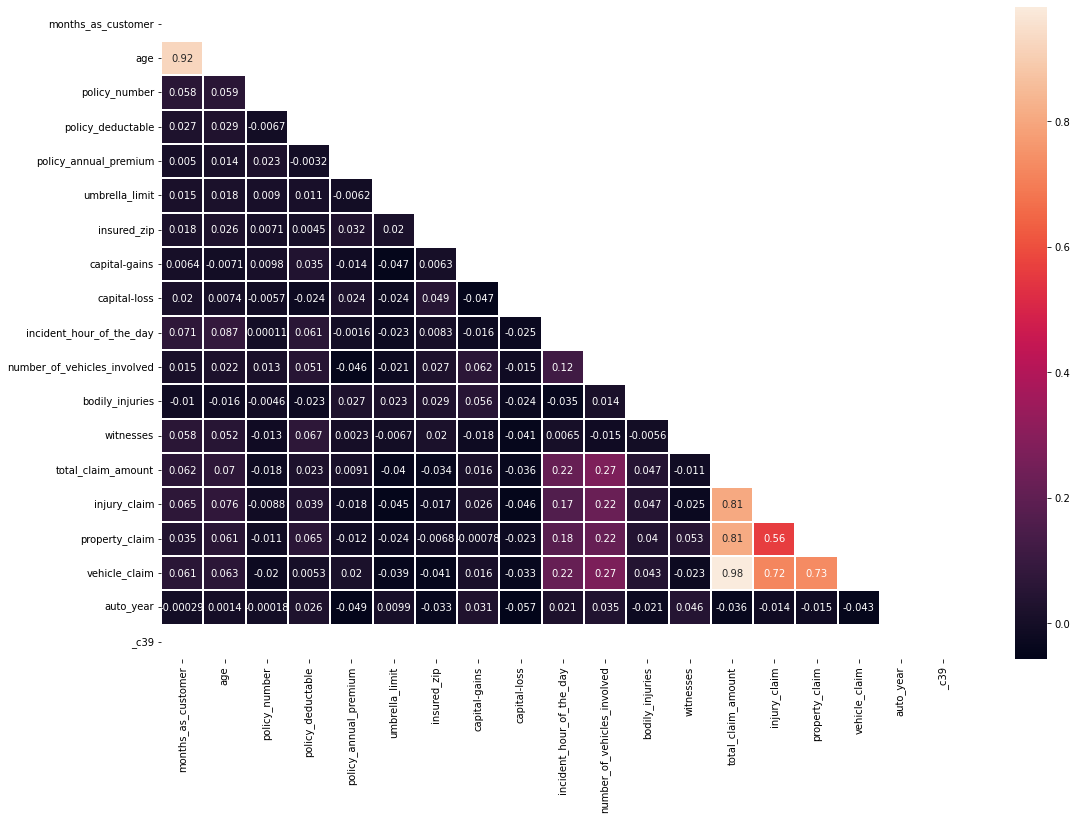

In [ ]:
# Revisamos la correlación entre las variables
plt.figure(figsize = (18, 12))

corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(data = corr, mask = mask, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

# 3.- Visualización de datos

## 3.1.- Variable categóricas

In [ ]:
# Variable categóricas
data_cat= data.select_dtypes(include = ['object'])

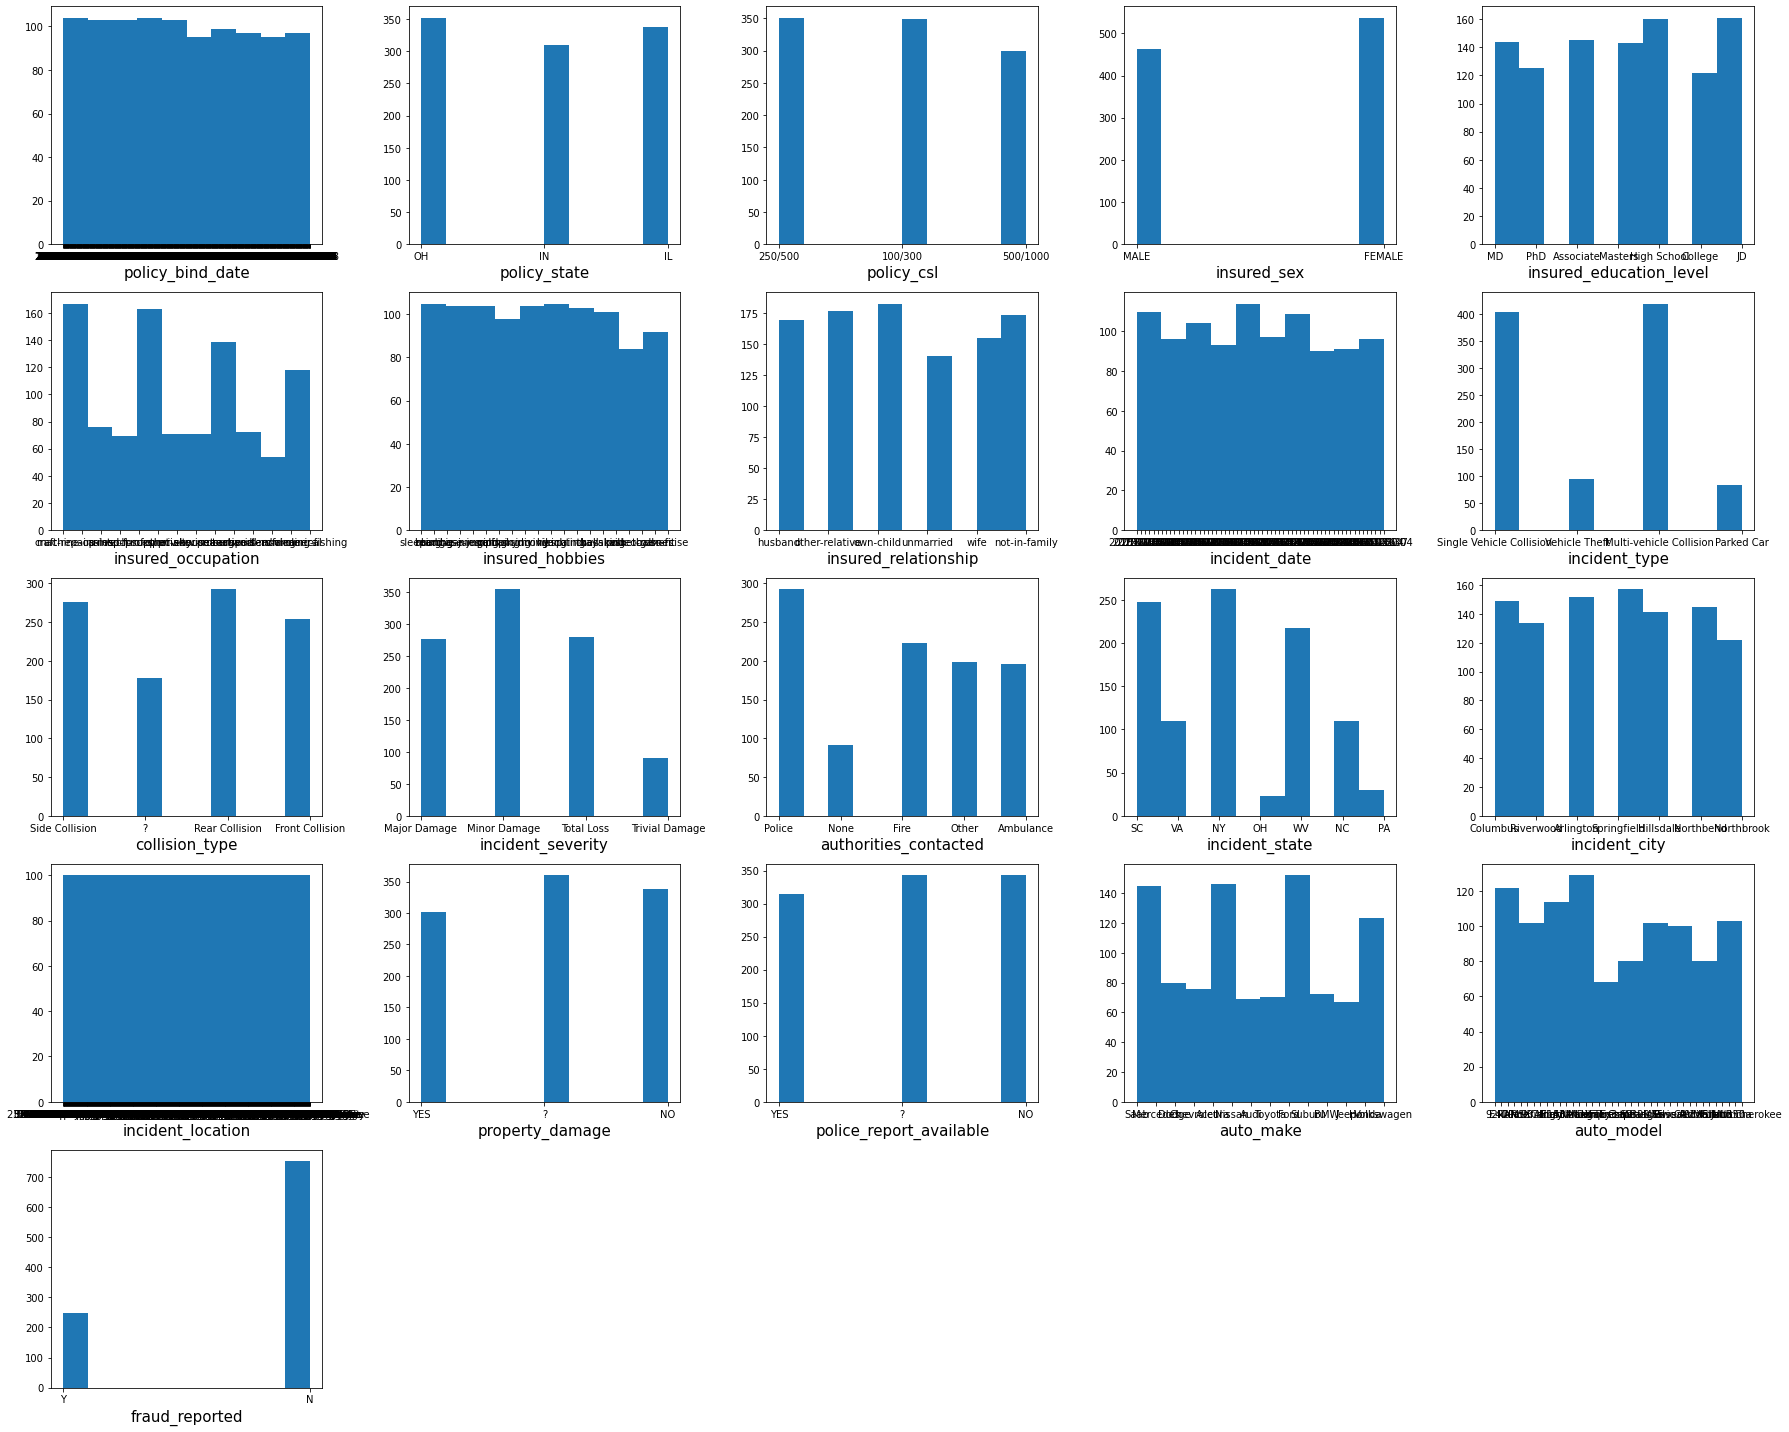

In [ ]:
# Distribución de las variables categóricas

plt.figure(figsize = (25, 20))
plotnumber = 1

for col in data_cat.columns:
    ax = plt.subplot(5, 5, plotnumber)
    plt.hist(data_cat[col])
    plt.xlabel(col, fontsize = 15)
    plotnumber += 1
    
plt.tight_layout()
plt.show()

Distribución de variables categóricas por fraude:

In [ ]:
# Configuramos tamaño de los gráficos
sns.set(rc = {'figure.figsize':(25,6)})

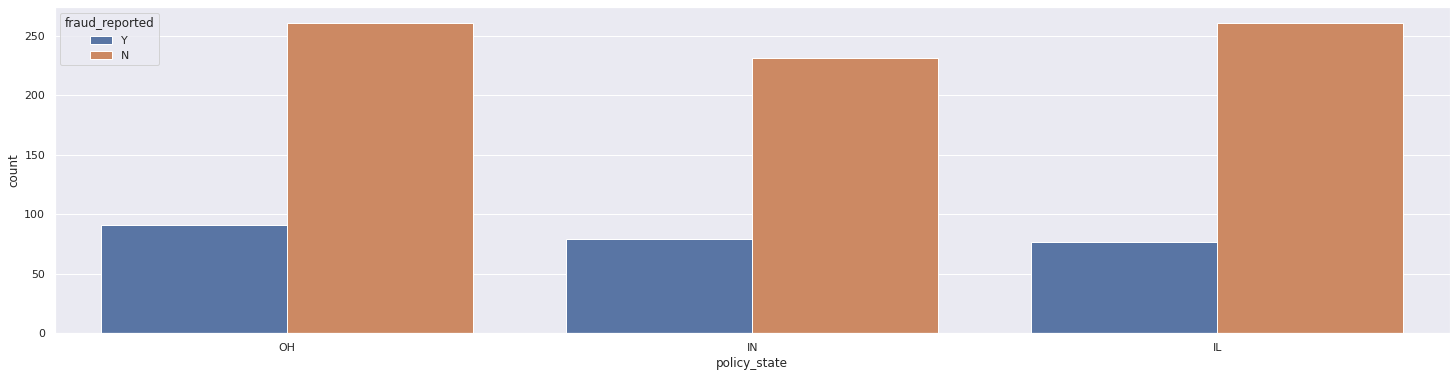

In [ ]:
#### policy_state ####
sns.countplot(data["policy_state"],orient='v',hue=data['fraud_reported'])

In [ ]:
# tabla de contingencia en porcentajes relativos segun categoria
pd.crosstab(index=data['fraud_reported'], columns=data['policy_state']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0)

policy_state           IL         IN         OH
fraud_reported                                 
N               77.218935  74.516129  74.147727
Y               22.781065  25.483871  25.852273

Al revisar la variable policy_state, vemos las cantidades y porcentajes muy parecidos segun la variable fraud_reported

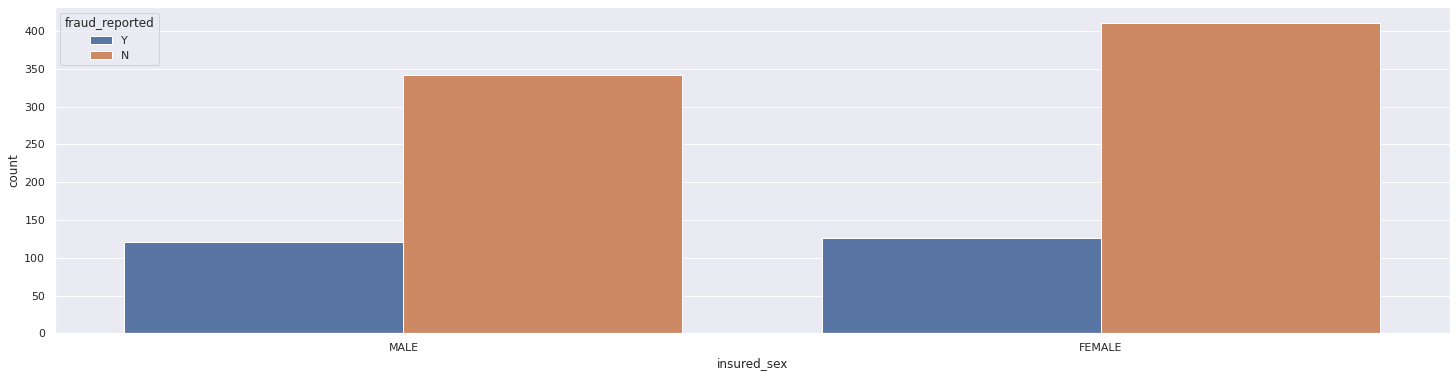

In [ ]:
#### insured_sex ####
sns.countplot(data["insured_sex"],orient='v',hue=data['fraud_reported'])

In [ ]:
# tabla de contingencia en porcentajes relativos segun categoria
pd.crosstab(index=data['fraud_reported'], columns=data['insured_sex']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0)

insured_sex        FEMALE       MALE
fraud_reported                      
N               76.536313  73.866091
Y               23.463687  26.133909

Podemos observar que los hombres tienden a realizar más fraudes, aunque es muy pequeña la  diferencia, por lo que consideramos despreciable esa tendencia.

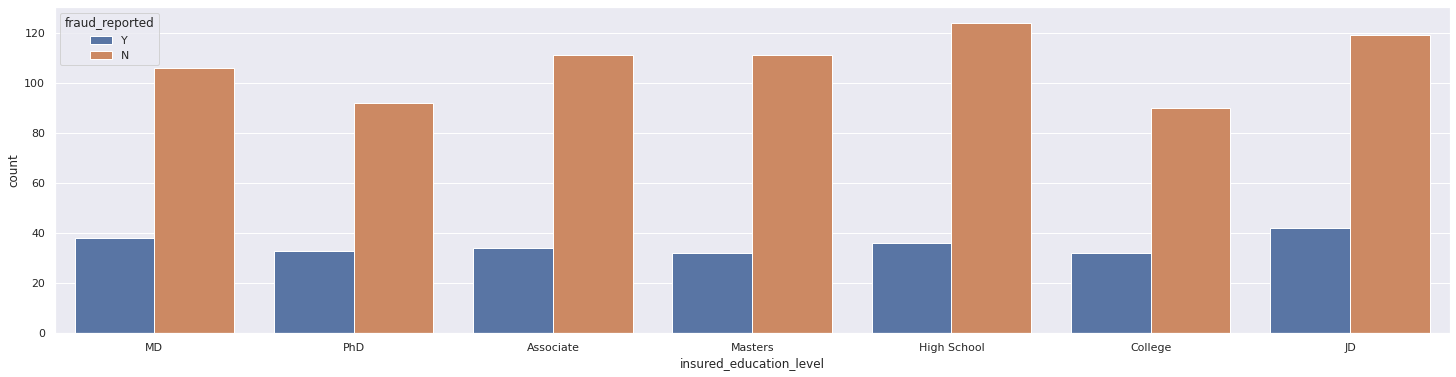

In [ ]:
#### insured_education_level ####
sns.countplot(data["insured_education_level"],orient='v',hue=data['fraud_reported'])

In [ ]:
# tabla de contingencia en porcentajes relativos segun categoria
pd.crosstab(index=data['fraud_reported'], columns=data['insured_education_level']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0)

insured_education_level  Associate    College  High School         JD  \
fraud_reported                                                          
N                        76.551724  73.770492         77.5  73.913043   
Y                        23.448276  26.229508         22.5  26.086957   

insured_education_level         MD    Masters   PhD  
fraud_reported                                       
N                        73.611111  77.622378  73.6  
Y                        26.388889  22.377622  26.4

No existe mucha diferencia de aquellos que realizan fraude según el nivel educacional

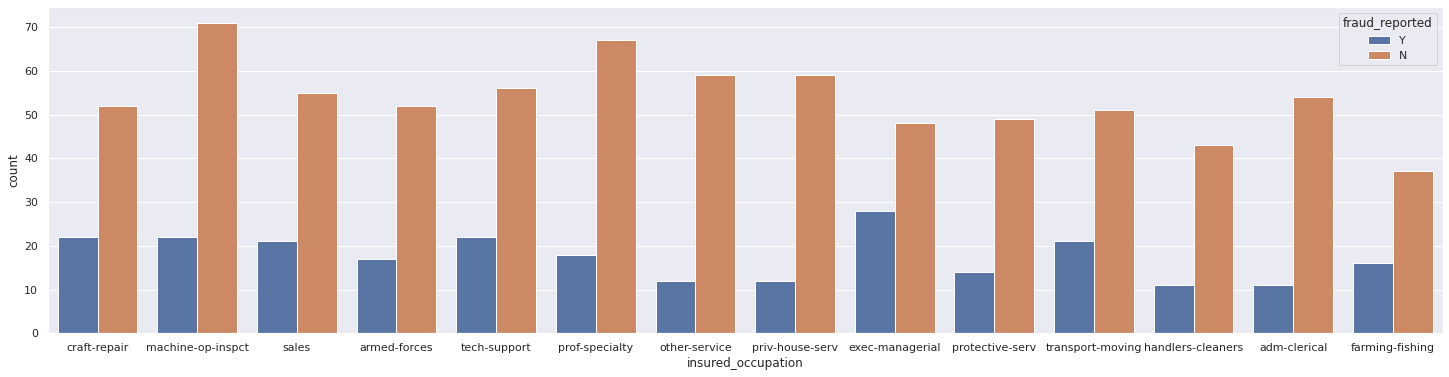

In [ ]:
#### insured_occupation ####
sns.countplot(data["insured_occupation"],orient='v',hue=data['fraud_reported'])

In [ ]:
# tabla de contingencia en porcentajes relativos segun categoria
pd.crosstab(index=data['fraud_reported'], columns=data['insured_occupation']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0)

insured_occupation  adm-clerical  armed-forces  craft-repair  exec-managerial  \
fraud_reported                                                                  
N                      83.076923     75.362319      70.27027        63.157895   
Y                      16.923077     24.637681      29.72973        36.842105   

insured_occupation  farming-fishing  handlers-cleaners  machine-op-inspct  \
fraud_reported                                                              
N                         69.811321           79.62963          76.344086   
Y                         30.188679           20.37037          23.655914   

insured_occupation  other-service  priv-house-serv  prof-specialty  \
fraud_reported                                                       
N                       83.098592        83.098592       78.823529   
Y                       16.901408        16.901408       21.176471   

insured_occupation  protective-serv      sales  tech-support  transport-moving  
fraud_reported                                                                  
N                         77.777778  72.368421     71.794872         70.833333  
Y                         22.222222  27.631579     28.205128         29.166667

Podemos observar que según la ocupación del asegurado, aquellos que son exec-managerial tienen una mayor tendencia a realizar fraude, según esta muestra arroja que un 36.8% realizaron fraude al seguro. En cambio, aquellos con ocupación adm-clerical, priv-house-serv y other-service, tienden a realizar una menor cantidad de fraude, reportando solo un 16.9%

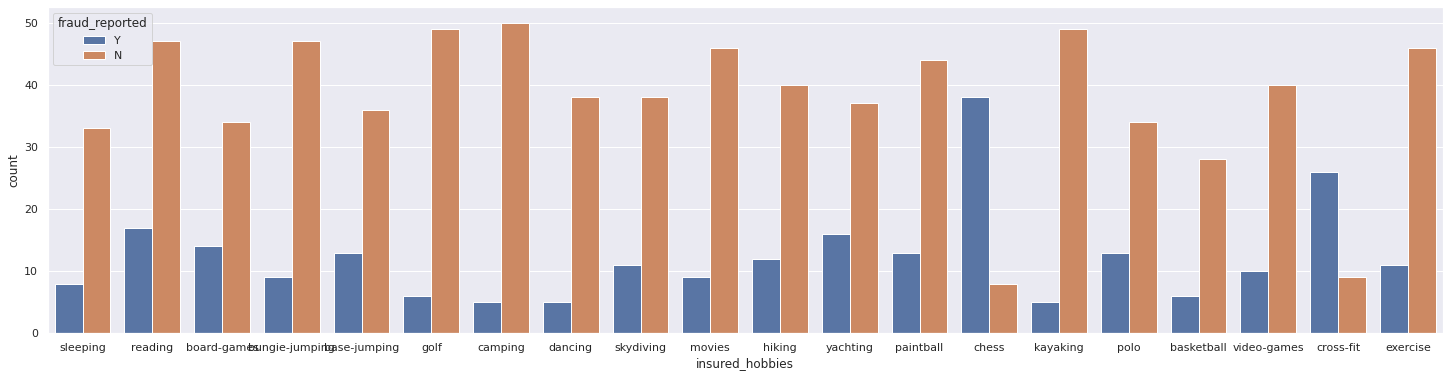

In [ ]:
#### insured_hobbies ####
sns.countplot(data["insured_hobbies"],orient='v',hue=data['fraud_reported'])

In [ ]:
# tabla de contingencia en porcentajes relativos segun categoria
pd.crosstab(index=data['fraud_reported'], columns=data['insured_hobbies']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0)

insured_hobbies  base-jumping  basketball  board-games  bungie-jumping  \
fraud_reported                                                           
N                   73.469388   82.352941    70.833333       83.928571   
Y                   26.530612   17.647059    29.166667       16.071429   

insured_hobbies    camping      chess  cross-fit    dancing   exercise  \
fraud_reported                                                           
N                90.909091  17.391304  25.714286  88.372093  80.701754   
Y                 9.090909  82.608696  74.285714  11.627907  19.298246   

insured_hobbies       golf     hiking   kayaking     movies  paintball  \
fraud_reported                                                           
N                89.090909  76.923077  90.740741  83.636364  77.192982   
Y                10.909091  23.076923   9.259259  16.363636  22.807018   

insured_hobbies       polo  reading  skydiving   sleeping  video-games  \
fraud_reported                                                           
N                72.340426  73.4375   77.55102  80.487805         80.0   
Y                27.659574  26.5625   22.44898  19.512195         20.0   

insured_hobbies   yachting  
fraud_reported              
N                69.811321  
Y                30.188679

Como observamos en el gráfico anterior y en la tabla de contingencia, vemos que aquellos con hobbies Chess y Cross-fit tienen una tendencia mucho mayor a realizar fraude en seguro automotriz, con un 82.6% y 74.2% respectivamente. En cambio, aquellos con menor probabilidad de realizar fraude son Camping y kayaking con un 9% de probabilidad.

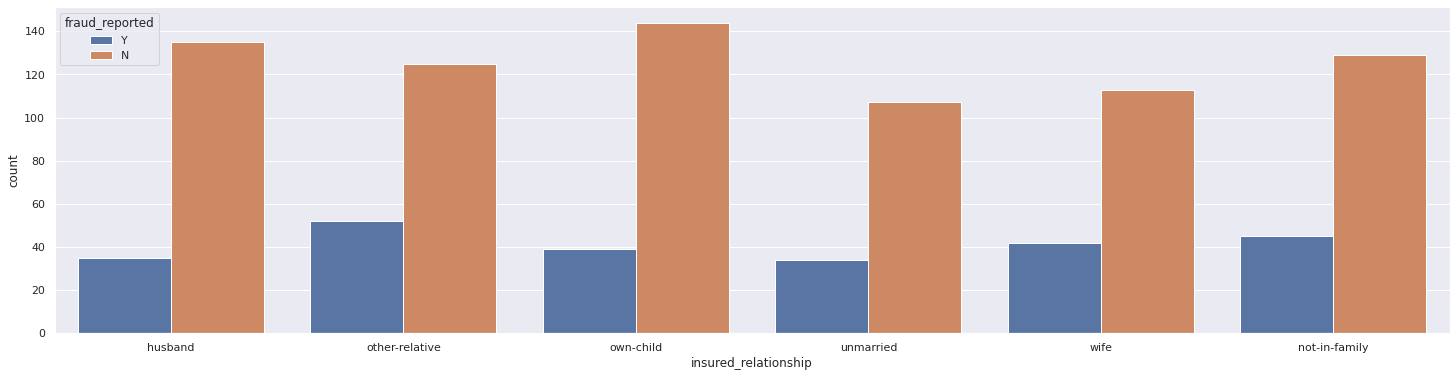

In [ ]:
#### insured_relationship ####
sns.countplot(data["insured_relationship"],orient='v',hue=data['fraud_reported'])

In [ ]:
# tabla de contingencia en porcentajes relativos segun categoria
pd.crosstab(index=data['fraud_reported'], columns=data['insured_relationship']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0)

insured_relationship    husband  not-in-family  other-relative  own-child  \
fraud_reported                                                              
N                     79.411765      74.137931       70.621469  78.688525   
Y                     20.588235      25.862069       29.378531  21.311475   

insured_relationship  unmarried       wife  
fraud_reported                              
N                     75.886525  72.903226  
Y                     24.113475  27.096774

Para insured_relationship no existe mucha diferencia entre aquellos que realizan fraude.

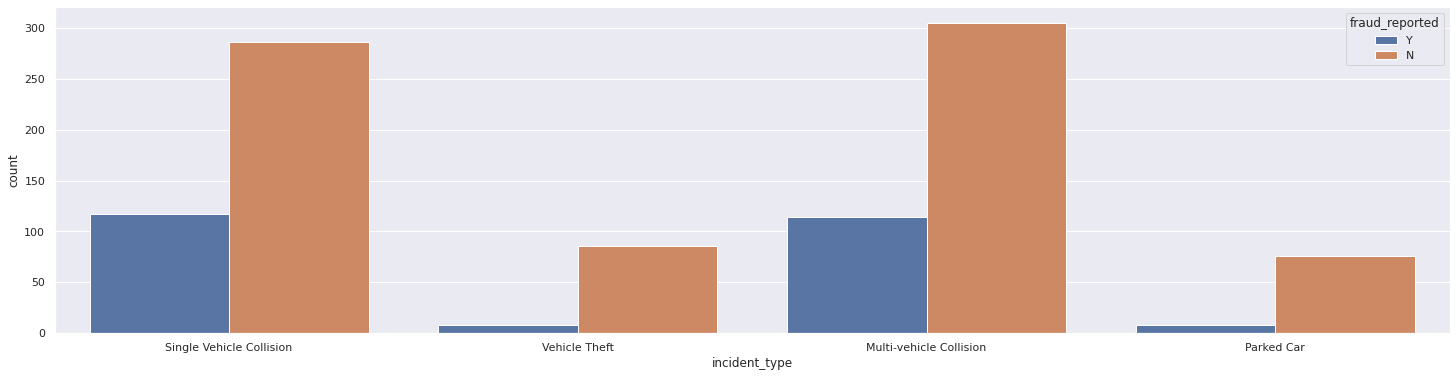

In [ ]:
#### incident_type ####
sns.countplot(data["incident_type"],orient='v',hue=data['fraud_reported'])

In [ ]:
# tabla de contingencia en porcentajes relativos segun categoria
pd.crosstab(index=data['fraud_reported'], columns=data['incident_type']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0)

incident_type   Multi-vehicle Collision  Parked Car  Single Vehicle Collision  \
fraud_reported                                                                  
N                             72.792363    90.47619                 70.967742   
Y                             27.207637     9.52381                 29.032258   

incident_type   Vehicle Theft  
fraud_reported                 
N                   91.489362  
Y                    8.510638

Según el tipo de incidente, podemos observar que existe una menor cantidad de hechos reportados en los tipos Parked Car y Vehicle Theft, a su vez estos dos tipos reportan solo 9.5% y 8.5% de fraudes realizados respectivamente, en comparación como los tipos Multi-vehicle Collision y Vehicle Collision, que reportan una mayor cantidad de sucesos registrados y una mayor cantidad de fraudes detectados.

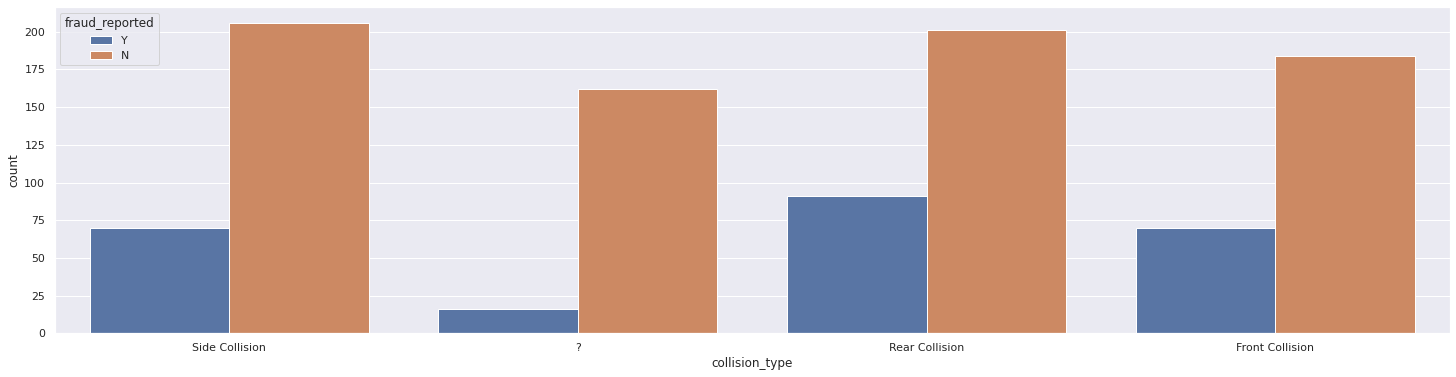

In [ ]:
#### collision_type ####
sns.countplot(data["collision_type"],orient='v',hue=data['fraud_reported'])

In [ ]:
# tabla de contingencia en porcentajes relativos segun categoria
pd.crosstab(index=data['fraud_reported'], columns=data['collision_type']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0)

collision_type          ?  Front Collision  Rear Collision  Side Collision
fraud_reported                                                            
N               91.011236        72.440945       68.835616       74.637681
Y                8.988764        27.559055       31.164384       25.362319

Como vemos, existen registros que no están categorizados en un tipo de colisión y que se han definido como ?, en donde estos incidentes registran solo un 8.9% de fraude, en cambio los que se encuentran categorizados parten con un 25.3% de fraudes registrados.

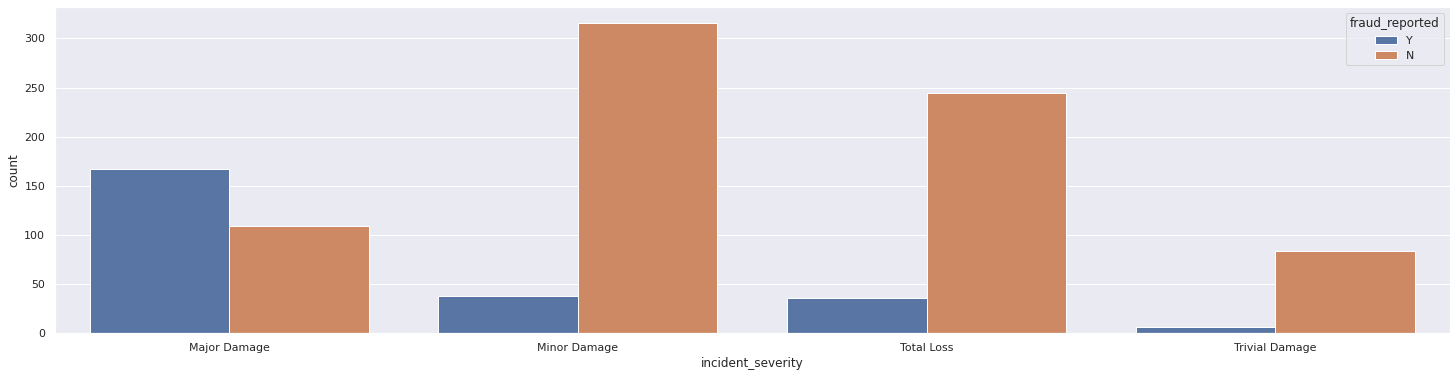

In [ ]:
#### incident_severity ####
sns.countplot(data["incident_severity"],orient='v',hue=data['fraud_reported'])

In [ ]:
# tabla de contingencia en porcentajes relativos segun categoria
pd.crosstab(index=data['fraud_reported'], columns=data['incident_severity']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0)

incident_severity  Major Damage  Minor Damage  Total Loss  Trivial Damage
fraud_reported                                                           
N                     39.492754     89.265537   87.142857       93.333333
Y                     60.507246     10.734463   12.857143        6.666667

En el análisis de la variable incident_severity, vemos que aquellos que se registran como Major Damage presentan una mayor probabilidad de fraude, de un 60.5%, en cambio para Trivial Damage solo registran el 6.6%.

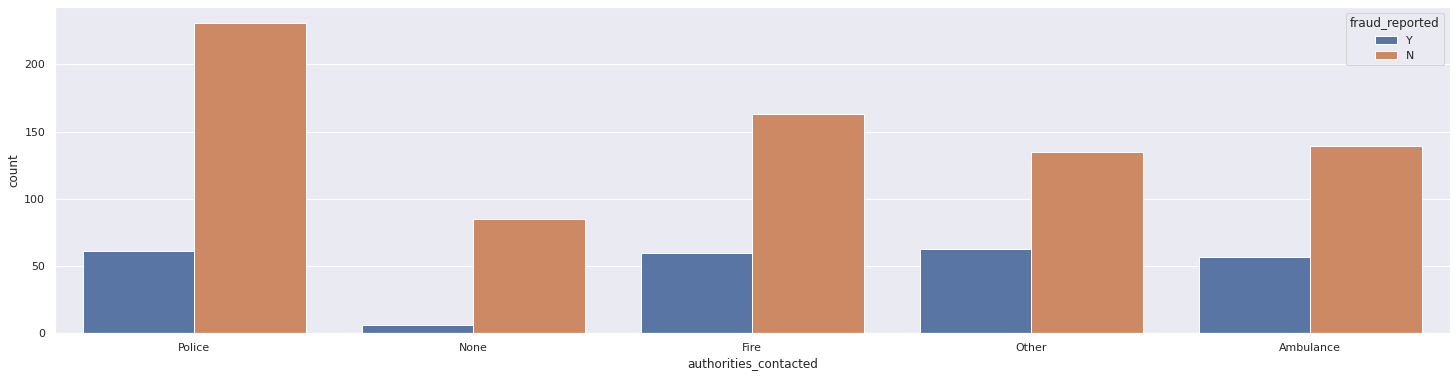

In [ ]:
#### authorities_contacted ####

sns.countplot(data["authorities_contacted"],orient='v',hue=data['fraud_reported'])

In [ ]:
# tabla de contingencia en porcentajes relativos segun categoria
pd.crosstab(index=data['fraud_reported'], columns=data['authorities_contacted']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0)

authorities_contacted  Ambulance      Fire       None      Other     Police
fraud_reported                                                             
N                      70.918367  73.09417  93.406593  68.181818  79.109589
Y                      29.081633  26.90583   6.593407  31.818182  20.890411

Como vemos, aquellos que no han contactado a alguna autoridad presentan una menor probabilidad de cometer fraude, con solo un 6.5%, en cambio para aquellos que se han marcado como autoridades contactadas "Other" tienen la mayor probabilidad de fraude, alcanzando un 31%.

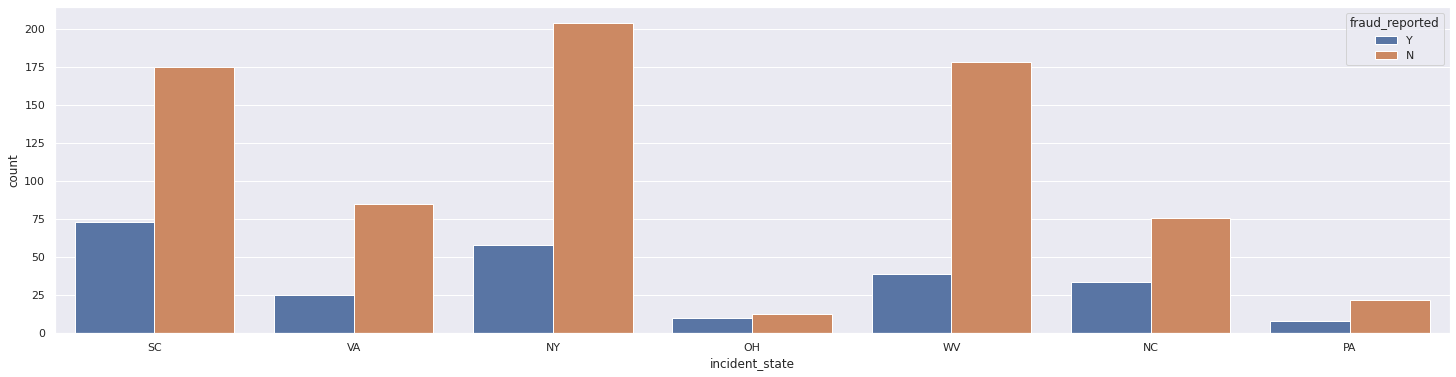

In [ ]:
#### incident_state ####

sns.countplot(data["incident_state"],orient='v',hue=data['fraud_reported'])

In [ ]:
# tabla de contingencia en porcentajes relativos segun categoria
pd.crosstab(index=data['fraud_reported'], columns=data['incident_state']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0)

incident_state         NC         NY         OH         PA         SC  \
fraud_reported                                                          
N               69.090909  77.862595  56.521739  73.333333  70.564516   
Y               30.909091  22.137405  43.478261  26.666667  29.435484   

incident_state         VA        WV  
fraud_reported                       
N               77.272727  82.02765  
Y               22.727273  17.97235

Podemos apreciar que aquellos que se registran como OH para el incident_state, presentan una mayor probabilidad de presentar fraude comparado con aquellos que se registraron con otro estado, aunque se debe tener presente que cuenta con pocos registros, por lo que podría estar sesgada la información por falta de una cantidad mayor de registros.

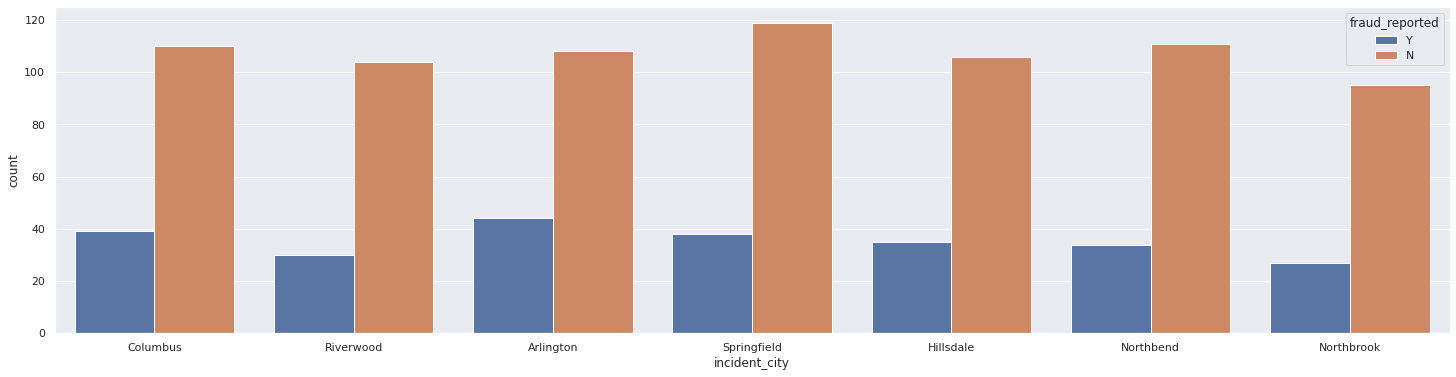

In [ ]:
#### incident_city ####

sns.countplot(data["incident_city"],orient='v',hue=data['fraud_reported'])

In [ ]:
# tabla de contingencia en porcentajes relativos segun categoria
pd.crosstab(index=data['fraud_reported'], columns=data['incident_city']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0)

incident_city   Arlington   Columbus  Hillsdale  Northbend  Northbrook  \
fraud_reported                                                           
N               71.052632  73.825503  75.177305  76.551724   77.868852   
Y               28.947368  26.174497  24.822695  23.448276   22.131148   

incident_city   Riverwood  Springfield  
fraud_reported                          
N                77.61194    75.796178  
Y                22.38806    24.203822

Para incident_city no existen diferencias relevantes entre aquellos que realizan fraude.

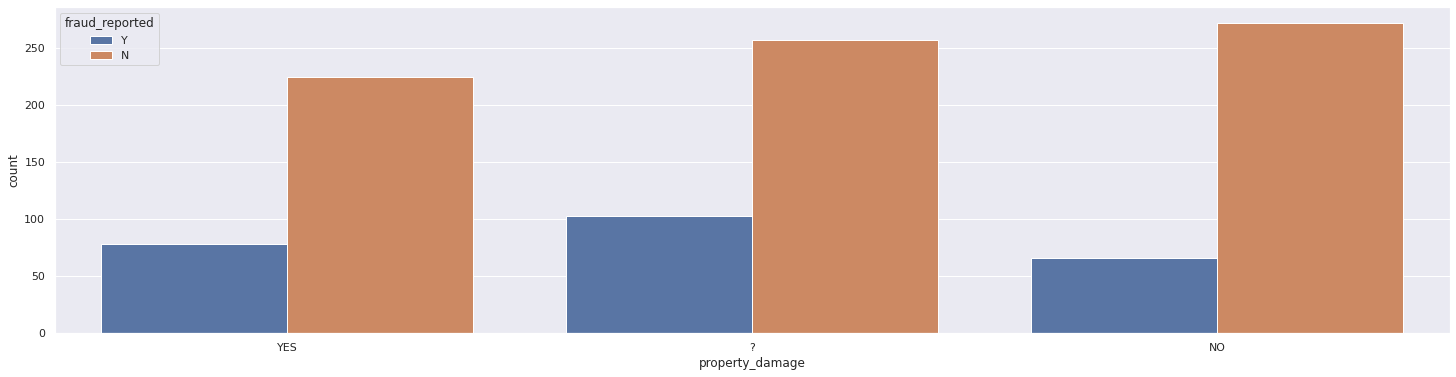

In [ ]:
#### property_damage ####

sns.countplot(data["property_damage"],orient='v',hue=data['fraud_reported'])

In [ ]:
# tabla de contingencia en porcentajes relativos segun categoria
pd.crosstab(index=data['fraud_reported'], columns=data['property_damage']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0)

property_damage          ?         NO        YES
fraud_reported                                  
N                71.388889  80.473373  74.172185
Y                28.611111  19.526627  25.827815

Para property_damage no existen diferencias relevantes entre aquellos que realizan fraude.

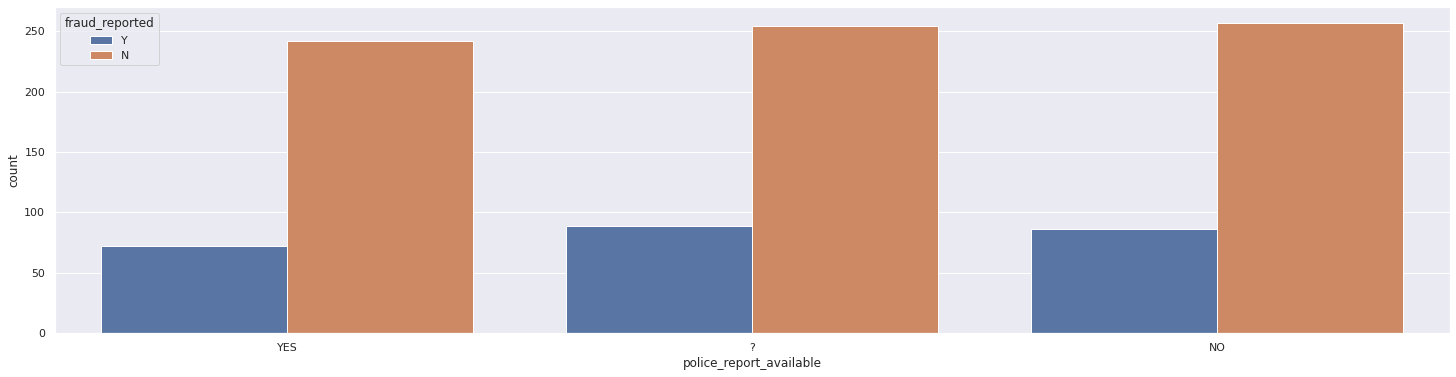

In [ ]:
#### police_report_available ####

sns.countplot(data["police_report_available"],orient='v',hue=data['fraud_reported'])

In [ ]:
# tabla de contingencia en porcentajes relativos segun categoria
pd.crosstab(index=data['fraud_reported'], columns=data['police_report_available']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0)

police_report_available          ?         NO        YES
fraud_reported                                          
N                        74.052478  74.927114  77.070064
Y                        25.947522  25.072886  22.929936

Para police_report_available no existen diferencias relevantes entre aquellos que realizan fraude.

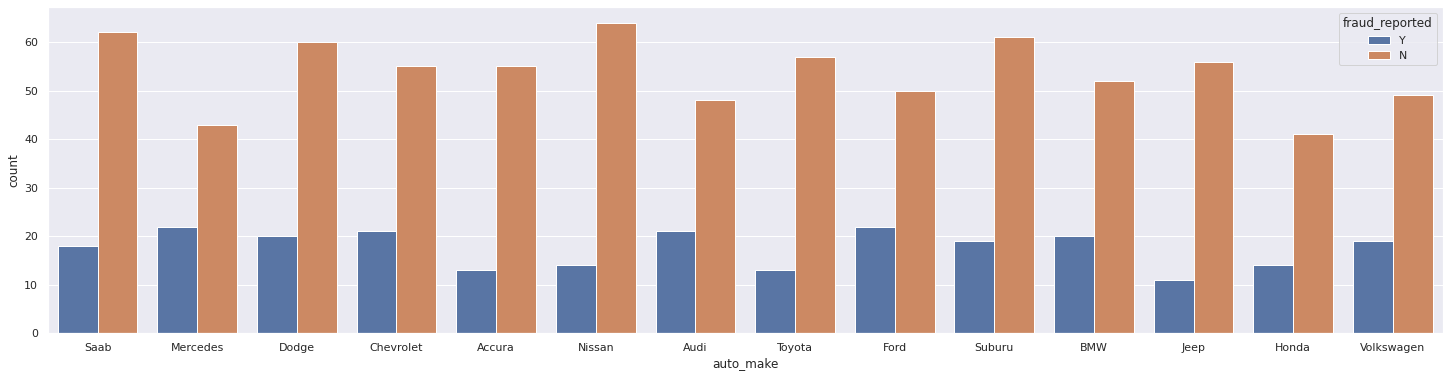

In [ ]:
#### auto_make ####

sns.countplot(data["auto_make"],orient='v',hue=data['fraud_reported'])

In [ ]:
# tabla de contingencia en porcentajes relativos segun categoria
pd.crosstab(index=data['fraud_reported'], columns=data['auto_make']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0)

auto_make          Accura       Audi        BMW  Chevrolet  Dodge       Ford  \
fraud_reported                                                                 
N               80.882353  69.565217  72.222222  72.368421   75.0  69.444444   
Y               19.117647  30.434783  27.777778  27.631579   25.0  30.555556   

auto_make           Honda      Jeep   Mercedes     Nissan  Saab  Suburu  \
fraud_reported                                                            
N               74.545455  83.58209  66.153846  82.051282  77.5   76.25   
Y               25.454545  16.41791  33.846154  17.948718  22.5   23.75   

auto_make          Toyota  Volkswagen  
fraud_reported                         
N               81.428571   72.058824  
Y               18.571429   27.941176

Para la variable auto_make, vemos que aquellos categorizados en Jeep presentan una menor probabilidad que se reporte un incidente como fraudulento, con solo un 16.4%, en cambio aquellos que son Mercedes presentan la mayor probabilidad de registrar el incidente como fraude, con un 33.8%  

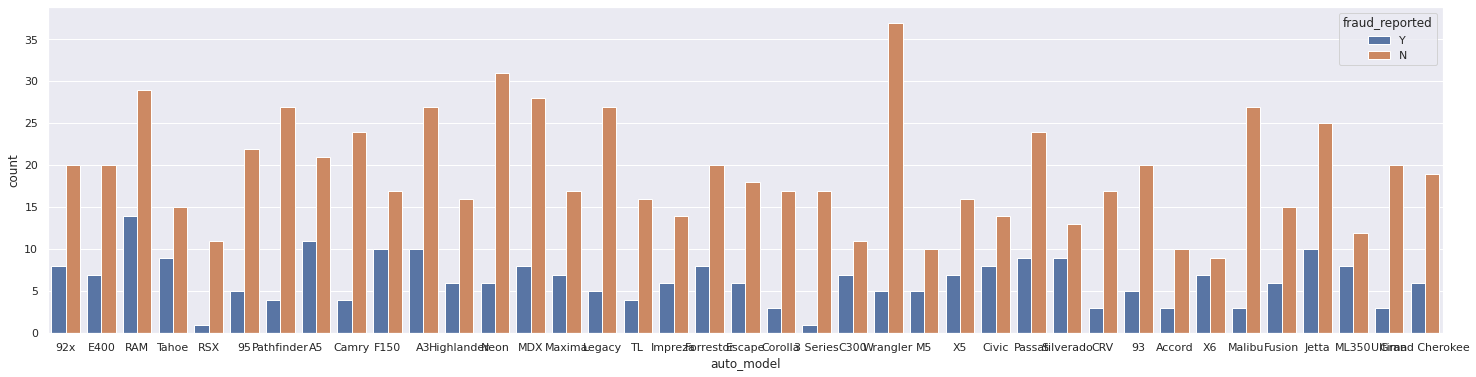

In [ ]:
#### auto_model ####

sns.countplot(data["auto_model"],orient="v",hue=data['fraud_reported'])

In [ ]:
# tabla de contingencia en porcentajes relativos segun categoria
pd.crosstab(index=data['fraud_reported'], columns=data['auto_model']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0)

auto_model       3 Series        92x    93         95         A3      A5  \
fraud_reported                                                             
N               94.444444  71.428571  80.0  81.481481  72.972973  65.625   
Y                5.555556  28.571429  20.0  18.518519  27.027027  34.375   

auto_model         Accord       C300   CRV      Camry      Civic  Corolla  \
fraud_reported                                                              
N               76.923077  61.111111  85.0  85.714286  63.636364     85.0   
Y               23.076923  38.888889  15.0  14.285714  36.363636     15.0   

auto_model           E400  Escape       F150  Forrestor     Fusion  \
fraud_reported                                                       
N               74.074074    75.0  62.962963  71.428571  71.428571   
Y               25.925926    25.0  37.037037  28.571429  28.571429   

auto_model      Grand Cherokee  Highlander  Impreza      Jetta  Legacy  \
fraud_reported                                                           
N                         76.0   72.727273     70.0  71.428571  84.375   
Y                         24.0   27.272727     30.0  28.571429  15.625   

auto_model             M5        MDX  ML350  Malibu     Maxima       Neon  \
fraud_reported                                                              
N               66.666667  77.777778   60.0    90.0  70.833333  83.783784   
Y               33.333333  22.222222   40.0    10.0  29.166667  16.216216   

auto_model         Passat  Pathfinder       RAM        RSX  Silverado    TL  \
fraud_reported                                                                
N               72.727273   87.096774  67.44186  91.666667  59.090909  80.0   
Y               27.272727   12.903226  32.55814   8.333333  40.909091  20.0   

auto_model      Tahoe     Ultima   Wrangler         X5     X6  
fraud_reported                                                 
N                62.5  86.956522  88.095238  69.565217  56.25  
Y                37.5  13.043478  11.904762  30.434783  43.75

Podemos observar que según la variable auto_model, aquellos que son X6 y Silverado presentan una mayor probabilidad de registrar un incidente como fraudulento, con un 43.7% y 40.9%, respectivamente. En casos contrario, los 3 Series y RSX son los que presentan un menor porcentaje de fraude, siendo un 5.5% y un 8.3% respectivamente.

## 3.2.- Variables numérica

In [ ]:
# Variables numéricas 
data_num = pd.concat([data.select_dtypes(include = ['int64']), data.select_dtypes(include = ['float64'])], axis = 1)

### Distribución de las variables numéricas:

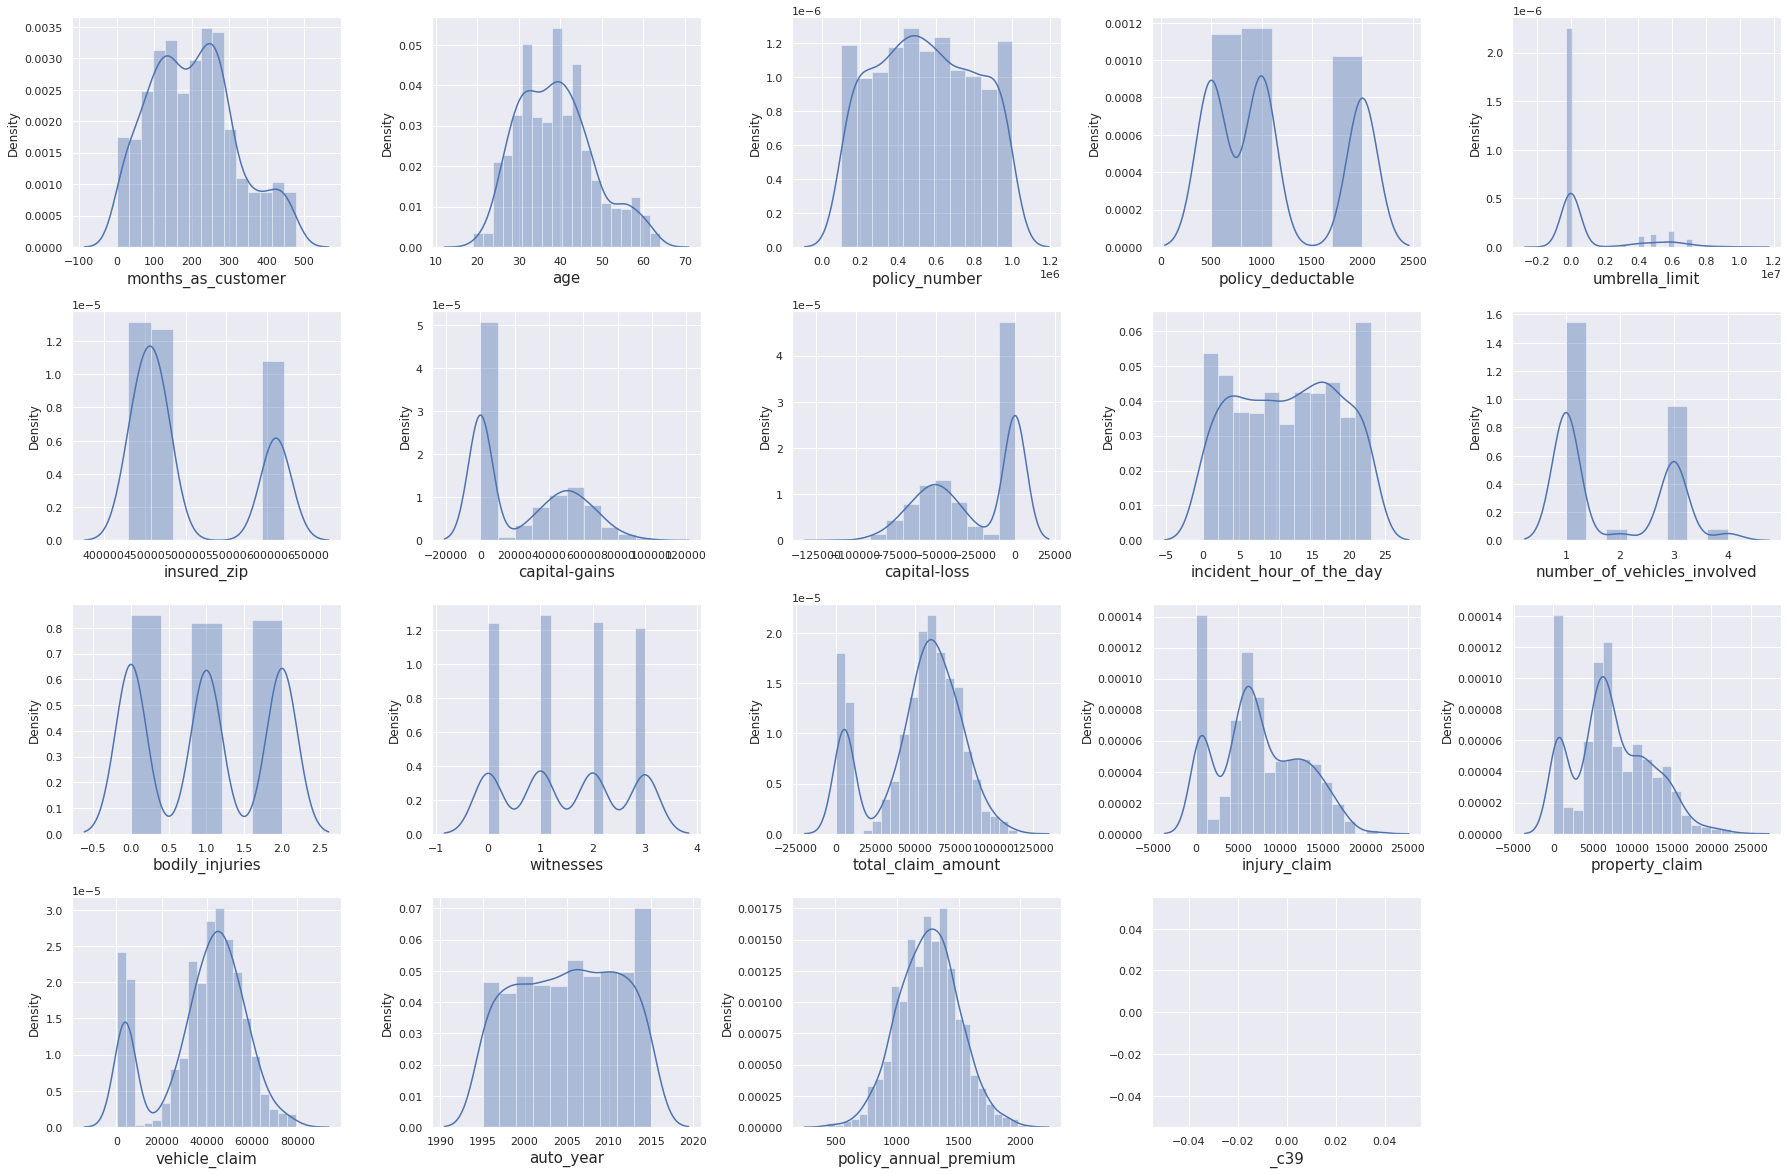

In [ ]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in data_num.columns:
    ax = plt.subplot(5, 5, plotnumber)
    sns.distplot(data_num[col])
    plt.xlabel(col, fontsize = 15)
    plotnumber += 1
    
plt.tight_layout()
plt.show()

### Distribución de variables numéricas por fraude:



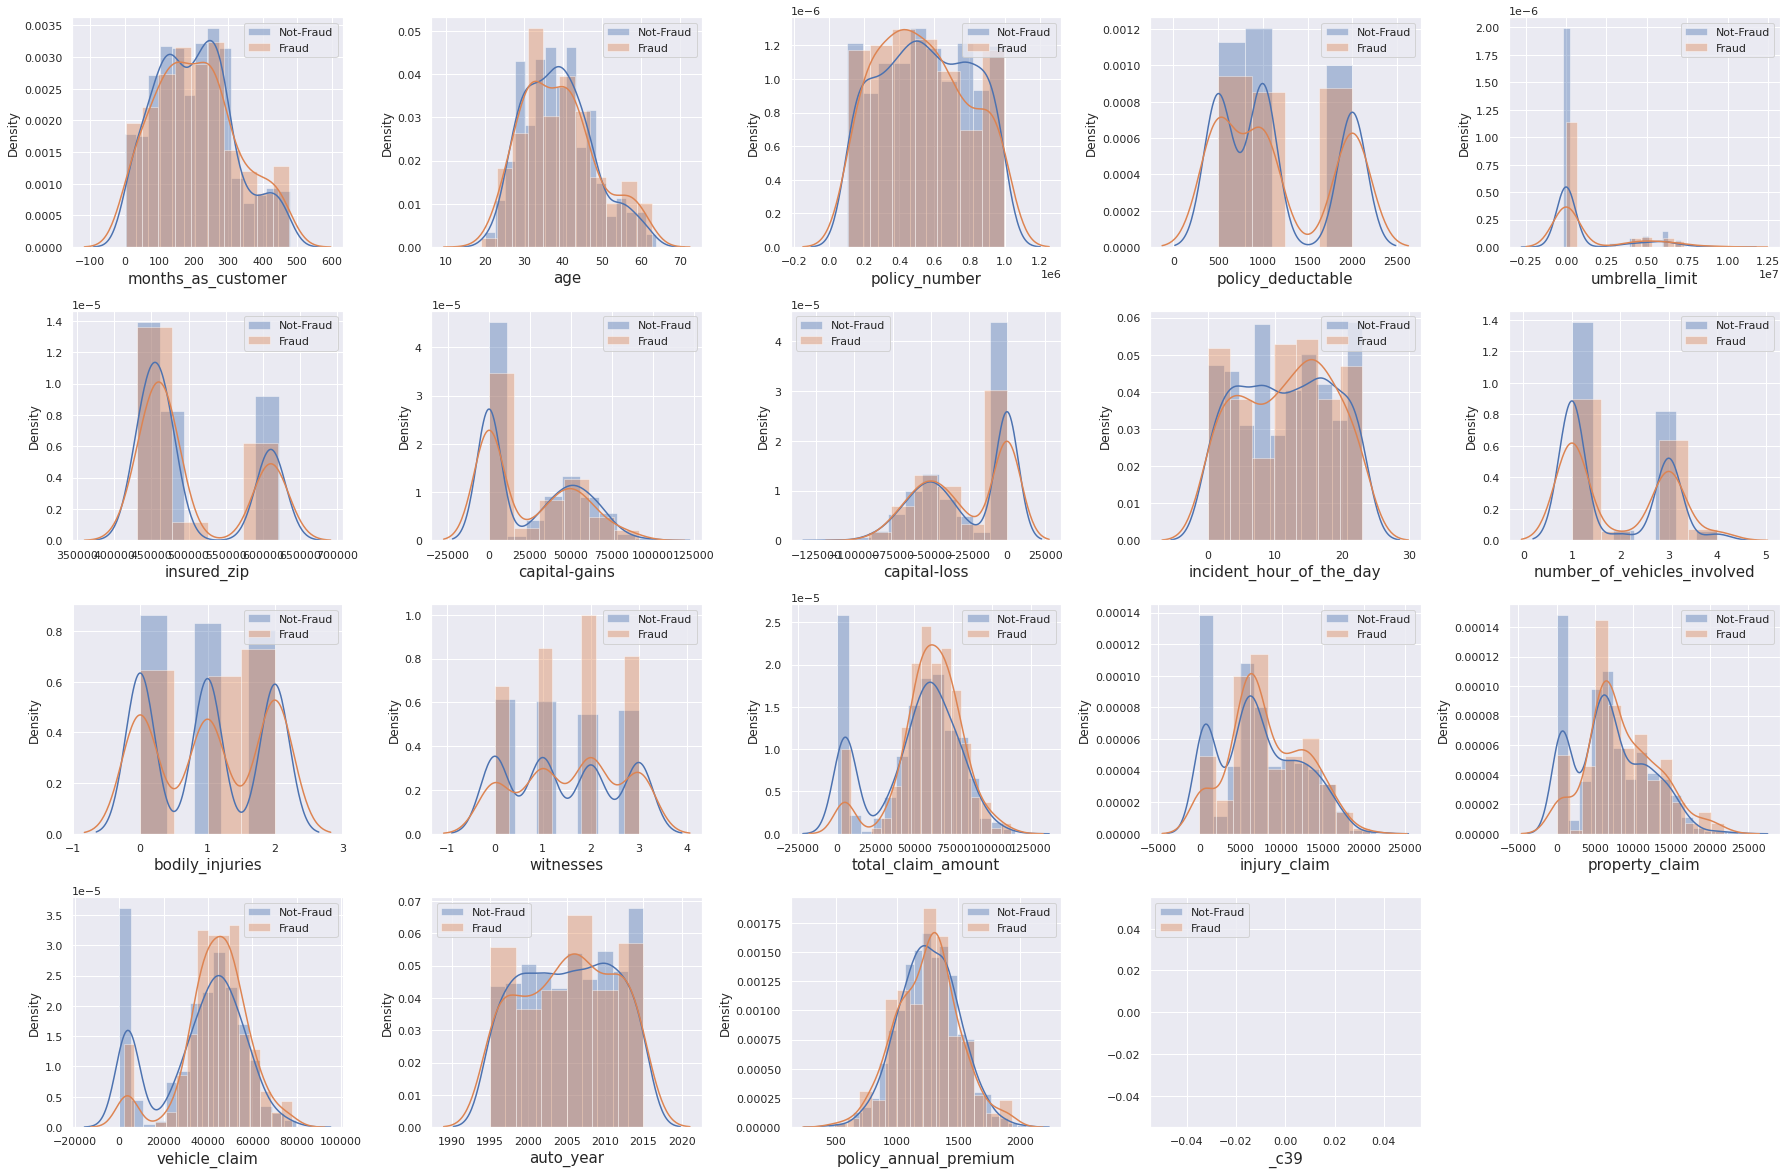

In [ ]:
plt.figure(figsize = (25, 20))
plotnumber = 1

data_f=data[data['fraud_reported']=='Y']
data_nf=data[data['fraud_reported']=='N']

for col in data_num.columns:
    ax = plt.subplot(5, 5, plotnumber)

    sns.distplot(data_nf[col], kde=True,label='Not-Fraud')
    sns.distplot(data_f[col], kde=True,label='Fraud')
    
    plt.xlabel(col, fontsize = 15)
    plotnumber += 1
    plt.legend()
plt.tight_layout()
plt.show()

### Análisis por variable numérica:

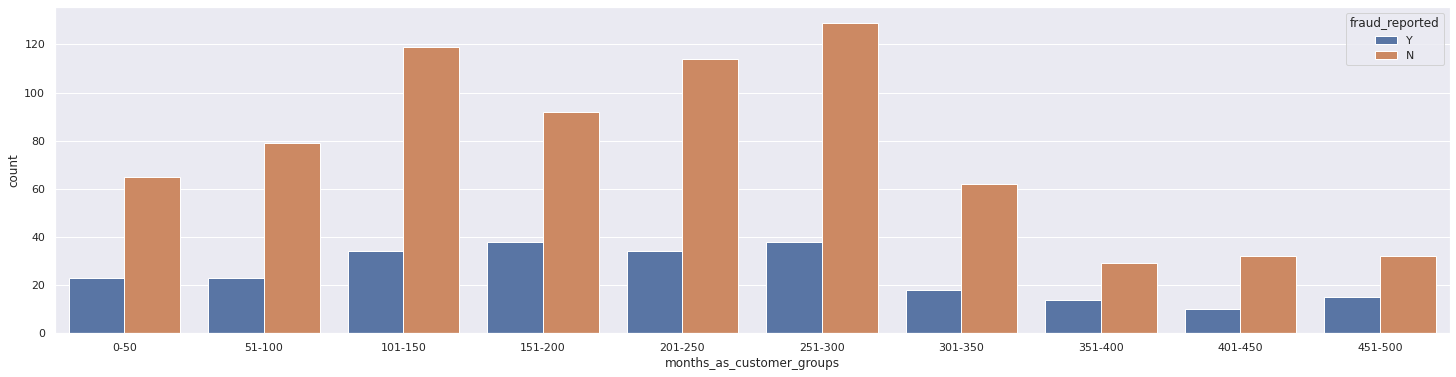

In [ ]:
#### months_as_customer ####

bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
bin_labels = ['0-50','51-100','101-150','151-200','201-250','251-300','301-350','351-400','401-450','451-500']
data_num['months_as_customer_groups'] = pd.cut(data_num['months_as_customer'], bins = 10, labels = bin_labels, include_lowest= True)

sns.countplot(data_num["months_as_customer_groups"],orient='v',hue=data['fraud_reported'])

In [ ]:
# tabla de contingencia en porcentajes relativos segun categoria
pd.crosstab(index=data['fraud_reported'], columns=data_num['months_as_customer_groups']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0)

months_as_customer_groups       0-50    51-100    101-150    151-200  \
fraud_reported                                                         
N                          73.863636  77.45098  77.777778  70.769231   
Y                          26.136364  22.54902  22.222222  29.230769   

months_as_customer_groups    201-250    251-300  301-350   351-400    401-450  \
fraud_reported                                                                  
N                          77.027027  77.245509     77.5  67.44186  76.190476   
Y                          22.972973  22.754491     22.5  32.55814  23.809524   

months_as_customer_groups    451-500  
fraud_reported                        
N                          68.085106  
Y                          31.914894

Para months_as_customer no existen diferencias relevantes entre aquellos que realizan fraude.

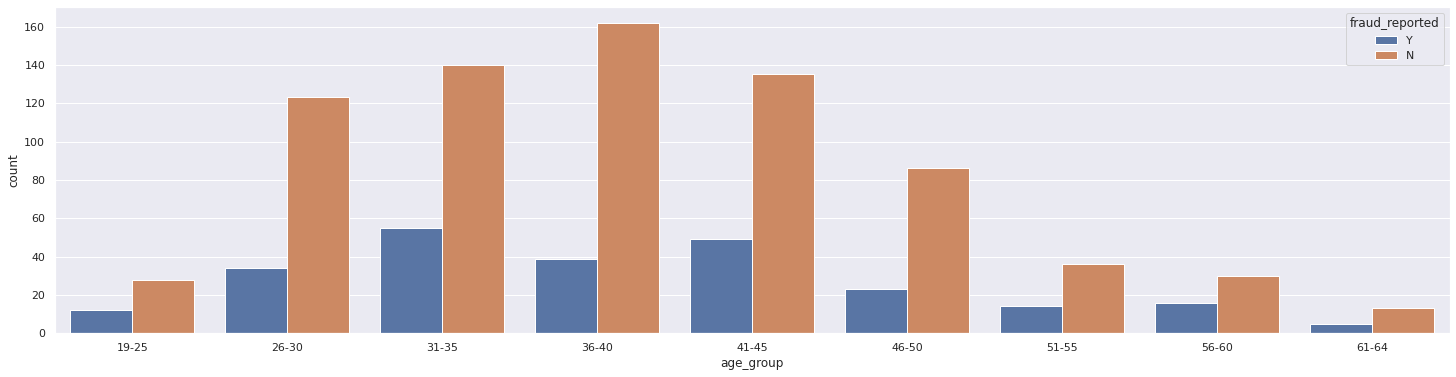

In [ ]:
#### age ####

bins = [19, 25, 30, 35, 40, 45, 50, 55, 60, 64]
bin_labels = ['19-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-64']
data_num['age_group'] = pd.cut(data_num['age'], bins = bins, labels = bin_labels, include_lowest = True)

sns.countplot(data_num["age_group"],orient='v',hue=data['fraud_reported'])

In [ ]:
# tabla de contingencia en porcentajes relativos segun categoria
pd.crosstab(index=data['fraud_reported'], columns=data_num['age_group']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0)

age_group       19-25      26-30      31-35      36-40      41-45      46-50  \
fraud_reported                                                                 
N                70.0  78.343949  71.794872  80.597015  73.369565  78.899083   
Y                30.0  21.656051  28.205128  19.402985  26.630435  21.100917   

age_group       51-55      56-60      61-64  
fraud_reported                               
N                72.0  65.217391  72.222222  
Y                28.0  34.782609  27.777778

Para la variable age, aquellos que están entre 36 y 40 años presentan una menor probabilidad de cometer fraude, con solo un 19.4%, en cambio aquellos entre 56 y 60 años, presentan un 34.7% de probabilidad de cometer fraude.

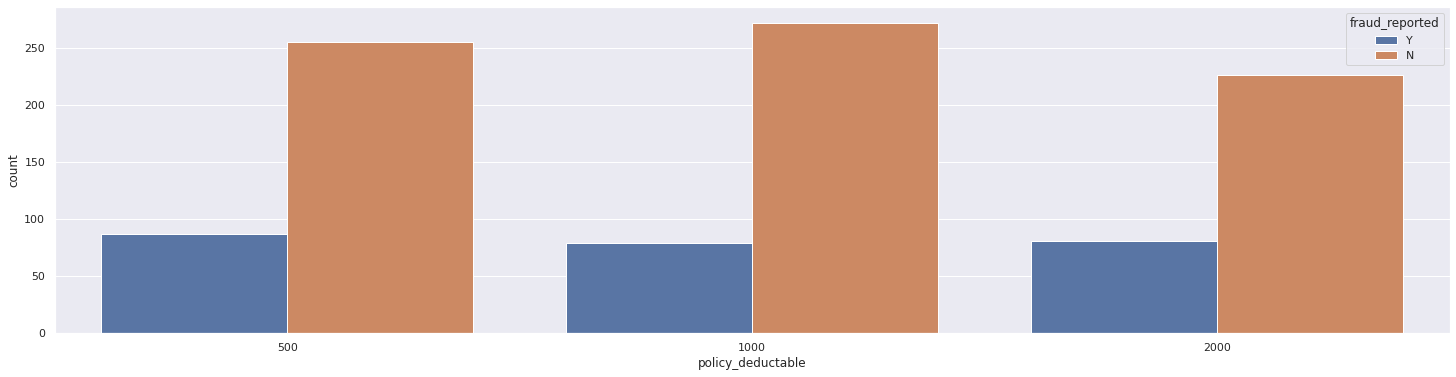

In [ ]:
#### policy_deductable ####

sns.countplot(data["policy_deductable"],orient='v',hue=data['fraud_reported'])

In [ ]:
# tabla de contingencia en porcentajes relativos segun categoria
pd.crosstab(index=data['fraud_reported'], columns=data_num['policy_deductable']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0)

policy_deductable       500        1000       2000
fraud_reported                                    
N                  74.561404  77.492877  73.615635
Y                  25.438596  22.507123  26.384365

Para la variable policy_deductable no existen diferencias relevantes entre aquellos que realizan fraude.

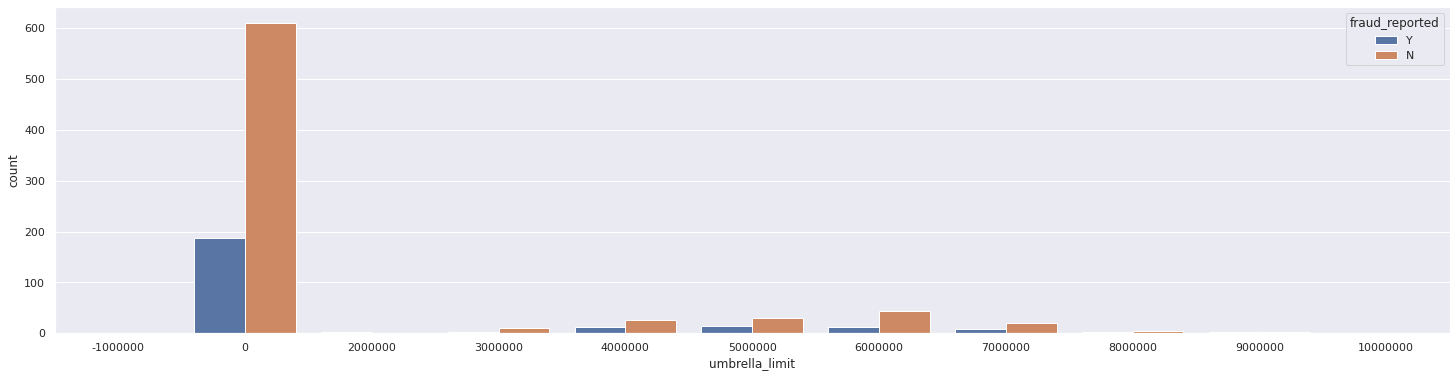

In [ ]:
#### umbrella_limit ####

sns.countplot(data["umbrella_limit"],orient='v',hue=data['fraud_reported'])

In [ ]:
# tabla de contingencia en porcentajes relativos segun categoria
pd.crosstab(index=data['fraud_reported'], columns=data_num['umbrella_limit']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0)

umbrella_limit  -1000000    0          2000000    3000000    4000000   \
fraud_reported                                                          
N                   100.0  76.566416  33.333333  83.333333  66.666667   
Y                     0.0  23.433584  66.666667  16.666667  33.333333   

umbrella_limit   5000000    6000000    7000000    8000000    9000000   \
fraud_reported                                                          
N               67.391304  77.192982  68.965517       62.5       60.0   
Y               32.608696  22.807018  31.034483       37.5       40.0   

umbrella_limit   10000000  
fraud_reported             
N                    50.0  
Y                    50.0

Podemos observar que existe una gran cantidad de registros con valor cero en la variable umbrella_limit, luego la concentración de registros está entre los 3000000 y 7000000, en donde para aquellos que se registran con 3000000, tienen una probabilidad de fraude de un 16%, y los registrados con 4000000 tienen una probabilidad de 33.3%

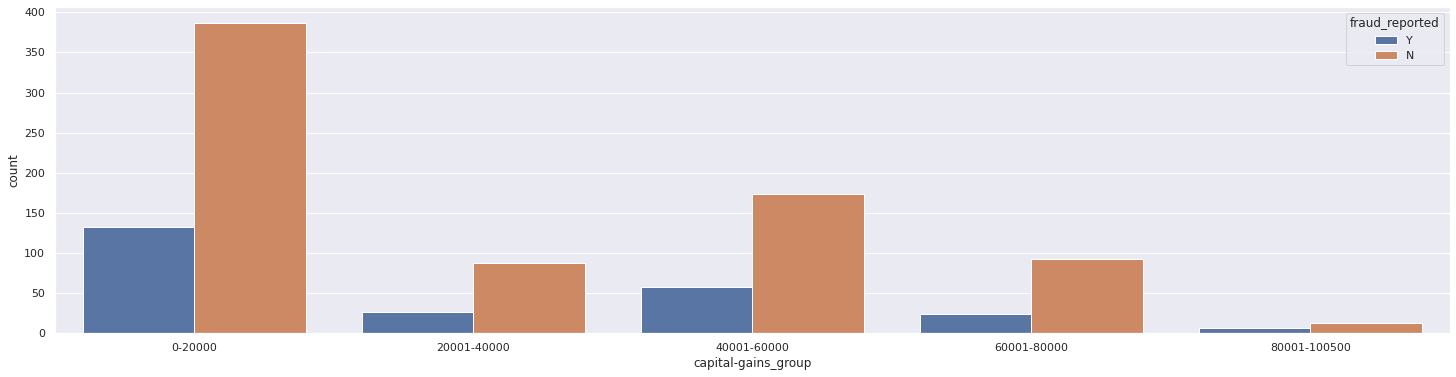

In [ ]:
#### capital-gains ####

bins = [0, 20000, 40000, 60000, 80000, 100500]
bin_labels = ['0-20000', '20001-40000', '40001-60000', '60001-80000', '80001-100500']
data_num['capital-gains_group'] = pd.cut(data_num['capital-gains'], bins = bins, labels = bin_labels, include_lowest = True)

sns.countplot(data_num["capital-gains_group"],orient='v',hue=data['fraud_reported'])

In [ ]:
# tabla de contingencia en porcentajes relativos segun categoria
pd.crosstab(index=data['fraud_reported'], columns=data_num['capital-gains_group']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0)

capital-gains_group    0-20000  20001-40000  40001-60000  60001-80000  \
fraud_reported                                                          
N                    74.566474    77.192982    74.891775    79.310345   
Y                    25.433526    22.807018    25.108225    20.689655   

capital-gains_group  80001-100500  
fraud_reported                     
N                            65.0  
Y                            35.0

Podemos observar que para la variable capital-gains, aquellos registros que se encuentran entre 80001 y 100500, existe un 35% de probabilidad que sea el incidente fraudulento, aunque se debe considerar que es el rango con menor cantidad de registros, asi que puede que esté sesgado el resultado. Entre los otros rangos, no existen diferencias relevantes.

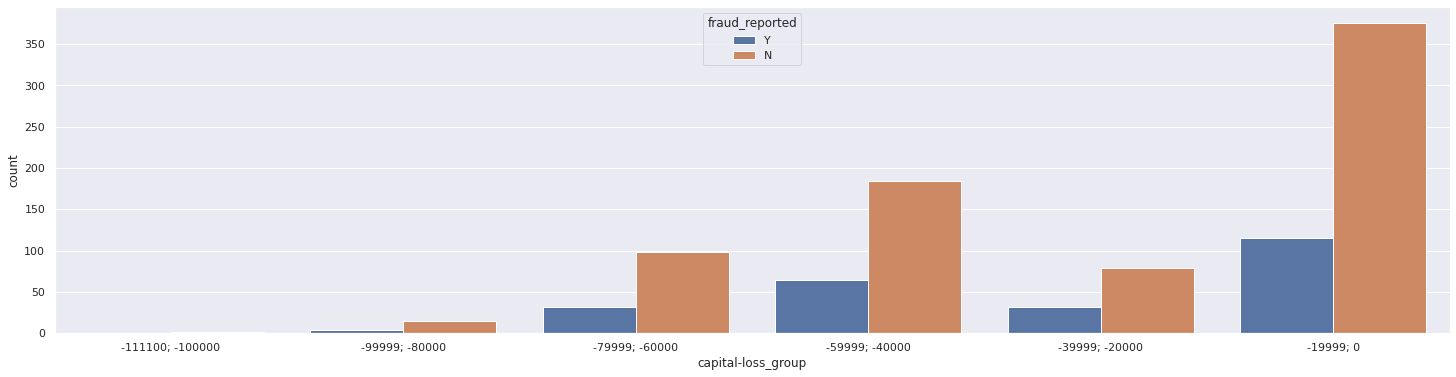

In [ ]:
#### capital-loss ####

bins = [-111100, -100000, -80000, -60000, -40000, -20000, 0]
bin_labels = ['-111100; -100000', '-99999; -80000', '-79999; -60000', '-59999; -40000', '-39999; -20000','-19999; 0']
data_num['capital-loss_group'] = pd.cut(data_num['capital-loss'], bins = bins, labels = bin_labels, include_lowest = True)

sns.countplot(data_num["capital-loss_group"],orient='v',hue=data['fraud_reported'])

In [ ]:
# tabla de contingencia en porcentajes relativos segun categoria
pd.crosstab(index=data['fraud_reported'], columns=data_num['capital-loss_group']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0)

capital-loss_group  -111100; -100000  -99999; -80000  -79999; -60000  \
fraud_reported                                                         
N                              100.0       78.947368       75.384615   
Y                                0.0       21.052632       24.615385   

capital-loss_group  -59999; -40000  -39999; -20000  -19999; 0  
fraud_reported                                                 
N                        74.193548       71.171171  76.578411  
Y                        25.806452       28.828829  23.421589

Para la variable capital-loss no existen diferencias relevantes entre aquellos que realizan fraude.

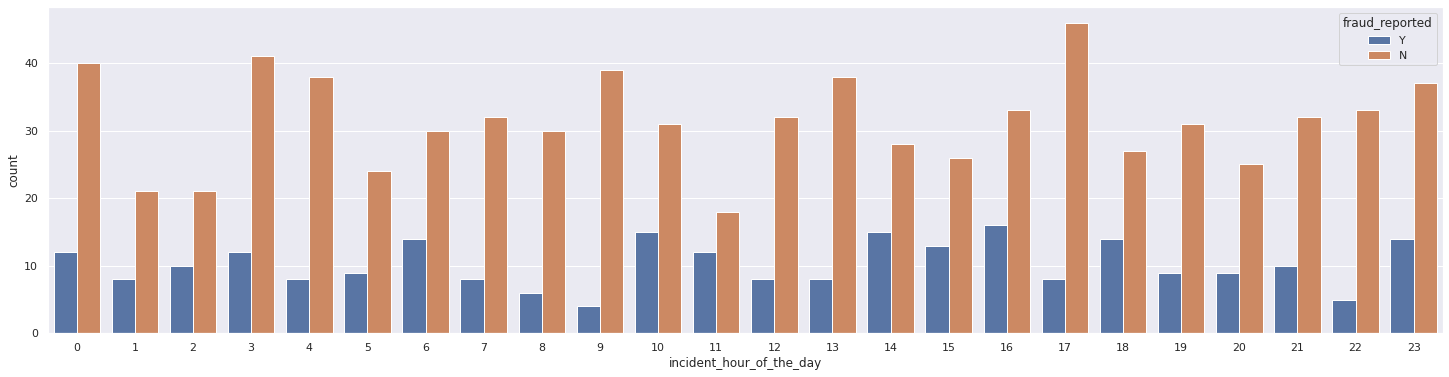

In [ ]:
#### incident_hour_of_the_day ####

sns.countplot(data_num["incident_hour_of_the_day"],orient='v',hue=data['fraud_reported'])

In [ ]:
# tabla de contingencia en porcentajes relativos segun categoria
pd.crosstab(index=data['fraud_reported'], columns=data_num['incident_hour_of_the_day']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0)

incident_hour_of_the_day         0          1          2          3   \
fraud_reported                                                         
N                         76.923077  72.413793  67.741935  77.358491   
Y                         23.076923  27.586207  32.258065  22.641509   

incident_hour_of_the_day         4          5          6     7          8   \
fraud_reported                                                               
N                         82.608696  72.727273  68.181818  80.0  83.333333   
Y                         17.391304  27.272727  31.818182  20.0  16.666667   

incident_hour_of_the_day         9          10    11    12         13  \
fraud_reported                                                          
N                         90.697674  67.391304  60.0  80.0  82.608696   
Y                          9.302326  32.608696  40.0  20.0  17.391304   

incident_hour_of_the_day         14         15         16         17  \
fraud_reported                                                         
N                         65.116279  66.666667  67.346939  85.185185   
Y                         34.883721  33.333333  32.653061  14.814815   

incident_hour_of_the_day         18    19         20         21         22  \
fraud_reported                                                               
N                         65.853659  77.5  73.529412  76.190476  86.842105   
Y                         34.146341  22.5  26.470588  23.809524  13.157895   

incident_hour_of_the_day        23  
fraud_reported                      
N                         72.54902  
Y                         27.45098

Al revisar las horas de día en que se registran los incidentes, podemos concluir que entre las 10 y 11 hrs y entre las 14 y 16 hrs, existe una mayor probabilidad de registrar un incidente fraudulento. 

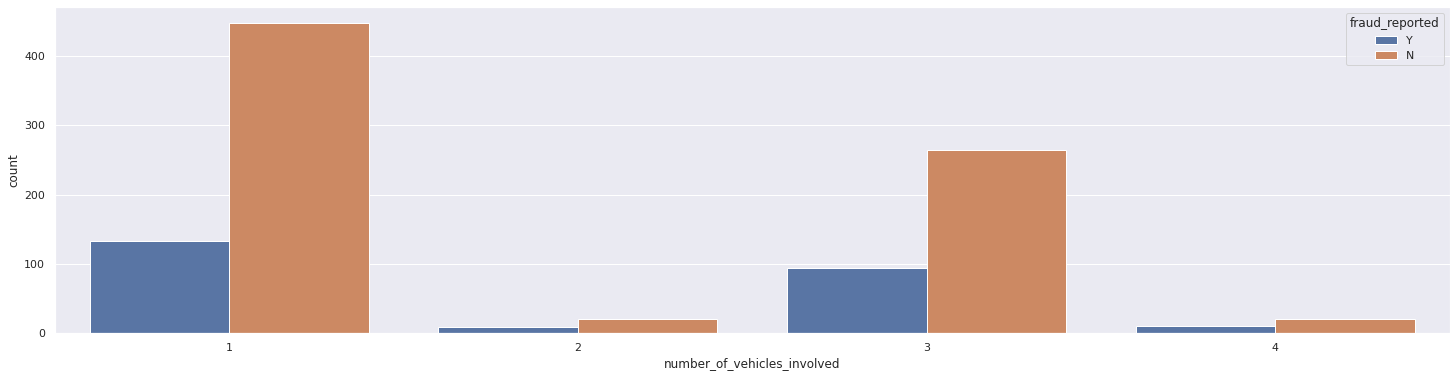

In [ ]:
#### number_of_vehicles_involved ####

sns.countplot(data_num["number_of_vehicles_involved"],orient='v',hue=data['fraud_reported'])

In [ ]:
# tabla de contingencia en porcentajes relativos segun categoria
pd.crosstab(index=data['fraud_reported'], columns=data_num['number_of_vehicles_involved']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0)

number_of_vehicles_involved          1     2          3          4
fraud_reported                                                    
N                            77.108434  70.0  73.743017  64.516129
Y                            22.891566  30.0  26.256983  35.483871

Para la variable number_of_vehicles_involved no existen diferencias relevantes entre aquellos que realizan fraude.

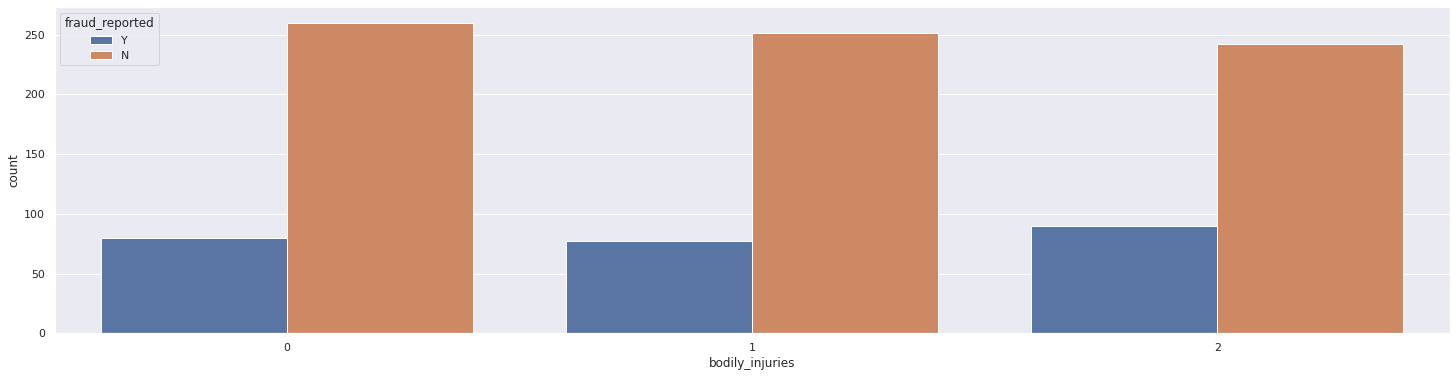

In [ ]:
#### bodily_injuries ####

sns.countplot(data_num["bodily_injuries"],orient='v',hue=data['fraud_reported'])

In [ ]:
# tabla de contingencia en porcentajes relativos segun categoria
pd.crosstab(index=data['fraud_reported'], columns=data_num['bodily_injuries']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0)

bodily_injuries          0         1          2
fraud_reported                                 
N                76.470588  76.52439  72.891566
Y                23.529412  23.47561  27.108434

Para la bodily_injuries no existen diferencias relevantes entre aquellos que realizan fraude.

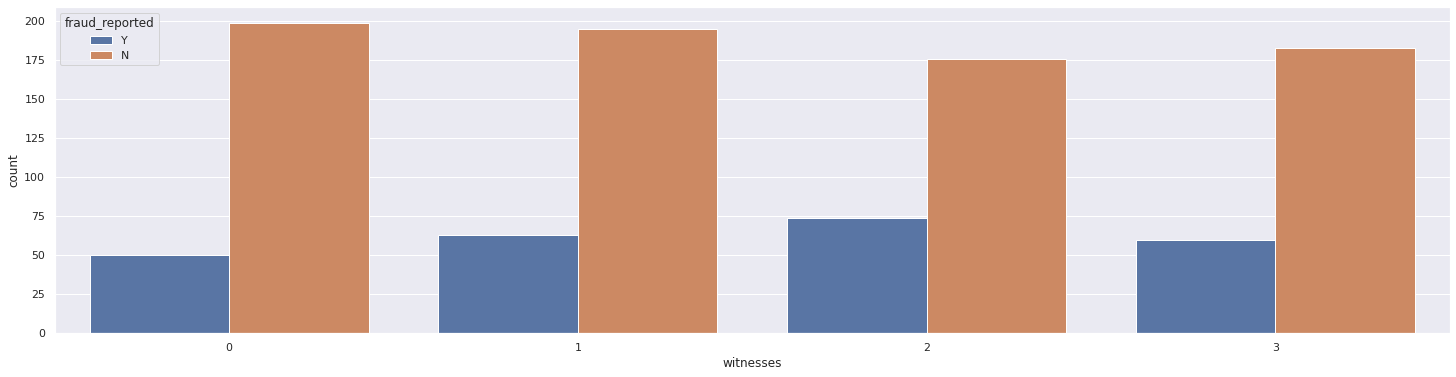

In [ ]:
#### witnesses #####

sns.countplot(data_num["witnesses"],orient='v',hue=data['fraud_reported'])

In [ ]:
# tabla de contingencia en porcentajes relativos segun categoria
pd.crosstab(index=data['fraud_reported'], columns=data_num['witnesses']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0)

witnesses               0          1     2          3
fraud_reported                                       
N               79.919679  75.581395  70.4  75.308642
Y               20.080321  24.418605  29.6  24.691358

Para la witnesses no existen diferencias relevantes entre aquellos que realizan fraude.

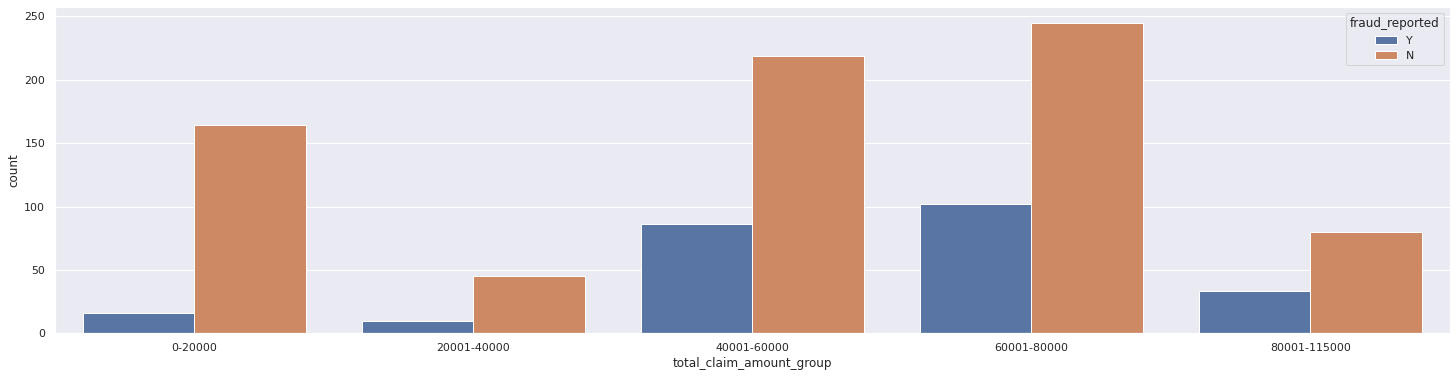

In [ ]:
#### total_claim_amount #####

bins = [0, 20000, 40000, 60000, 80000, 115000]
bin_labels = ['0-20000', '20001-40000', '40001-60000', '60001-80000', '80001-115000']
data_num['total_claim_amount_group'] = pd.cut(data_num['total_claim_amount'], bins = bins, labels = bin_labels, include_lowest = True)

sns.countplot(data_num["total_claim_amount_group"],orient='v',hue=data['fraud_reported'])

In [ ]:
# tabla de contingencia en porcentajes relativos segun categoria
pd.crosstab(index=data['fraud_reported'], columns=data_num['total_claim_amount_group']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0)

total_claim_amount_group    0-20000  20001-40000  40001-60000  60001-80000  \
fraud_reported                                                               
N                         91.111111    81.818182    71.803279    70.605187   
Y                          8.888889    18.181818    28.196721    29.394813   

total_claim_amount_group  80001-115000  
fraud_reported                          
N                             70.79646  
Y                             29.20354

Para la variable total_claim_amount, entre los rango 0 y 20000, existe una probabilidad del 8.8% que se registre como un fraude, pero desde los 40001 en adelante, se registra entre un 28% y 29% de probabilidad de fraude.

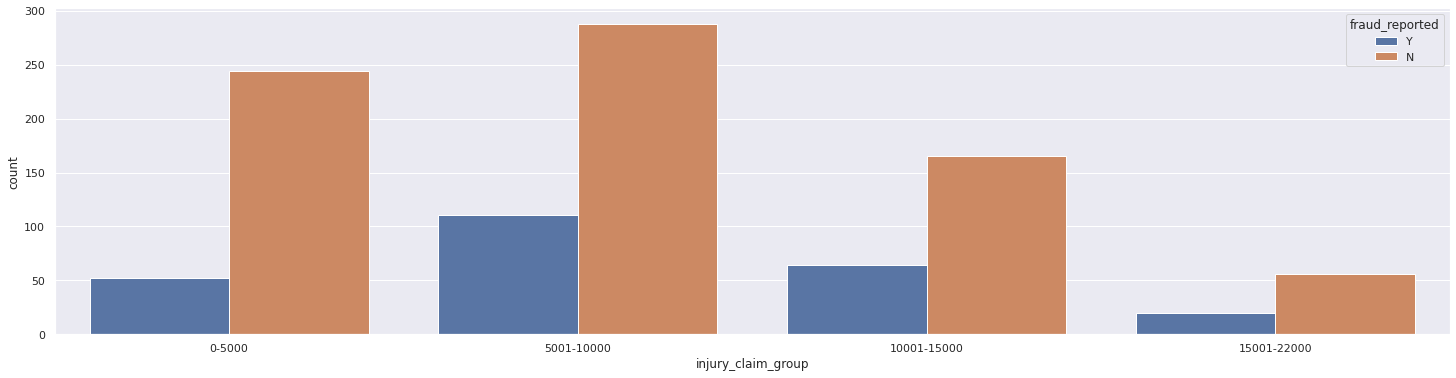

In [ ]:
#### injury_claim #####

bins = [0, 5000, 10000, 15000, 22000] 
bin_labels = ['0-5000', '5001-10000', '10001-15000', '15001-22000']
data_num['injury_claim_group'] = pd.cut(data_num['injury_claim'], bins = bins, labels = bin_labels, include_lowest = True)

sns.countplot(data_num["injury_claim_group"],orient='v',hue=data['fraud_reported'])

In [ ]:
# tabla de contingencia en porcentajes relativos segun categoria
pd.crosstab(index=data['fraud_reported'], columns=data_num['injury_claim_group']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0)

injury_claim_group     0-5000  5001-10000  10001-15000  15001-22000
fraud_reported                                                     
N                   82.432432   72.180451    72.052402    73.684211
Y                   17.567568   27.819549    27.947598    26.315789

Para la variable injury_claim, entre los valores 0 y 5000 se registran las menores probabilidades de realizar fraude, con solo un 17%, desde los 5001 en adelante existe una probabilidad entre 26 y 27% de probabilidad de registrar un incidente fraudulento.

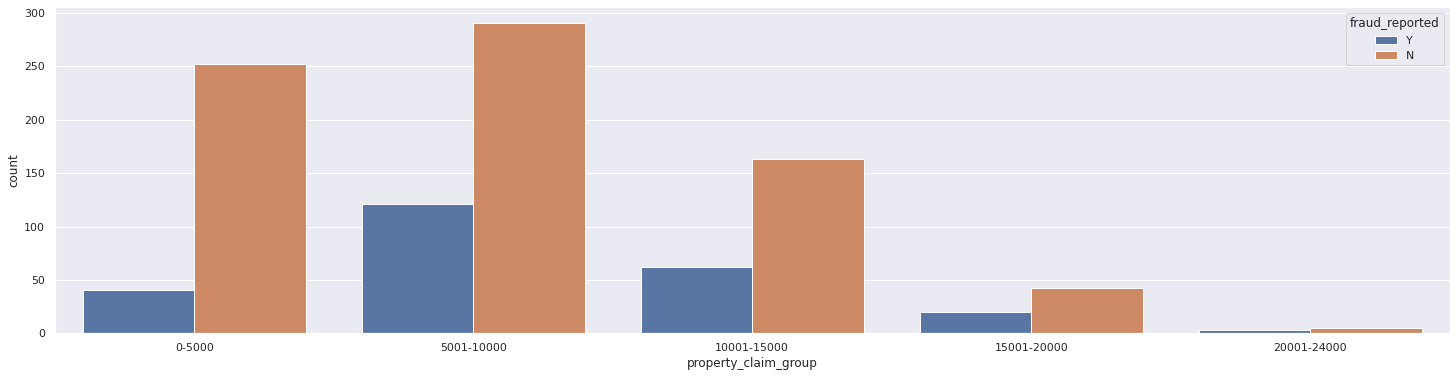

In [ ]:
#### property_claim #####

bins = [0, 5000, 10000, 15000, 20000, 24000] 
bin_labels = ['0-5000', '5001-10000', '10001-15000', '15001-20000', '20001-24000']
data_num['property_claim_group'] = pd.cut(data_num['property_claim'], bins = bins, labels = bin_labels, include_lowest = True)

sns.countplot(data_num["property_claim_group"],orient='v',hue=data['fraud_reported'])

In [ ]:
# tabla de contingencia en porcentajes relativos segun categoria
pd.crosstab(index=data['fraud_reported'], columns=data_num['property_claim_group']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0)

property_claim_group     0-5000  5001-10000  10001-15000  15001-20000  \
fraud_reported                                                          
N                     86.006826   70.631068    72.444444    67.741935   
Y                     13.993174   29.368932    27.555556    32.258065   

property_claim_group  20001-24000  
fraud_reported                     
N                            62.5  
Y                            37.5

Para la variable property_claim, entre 0 y 5000 existe la menmor probabilidad de cometer fraude, con solo un 13.9% de probabilidad.

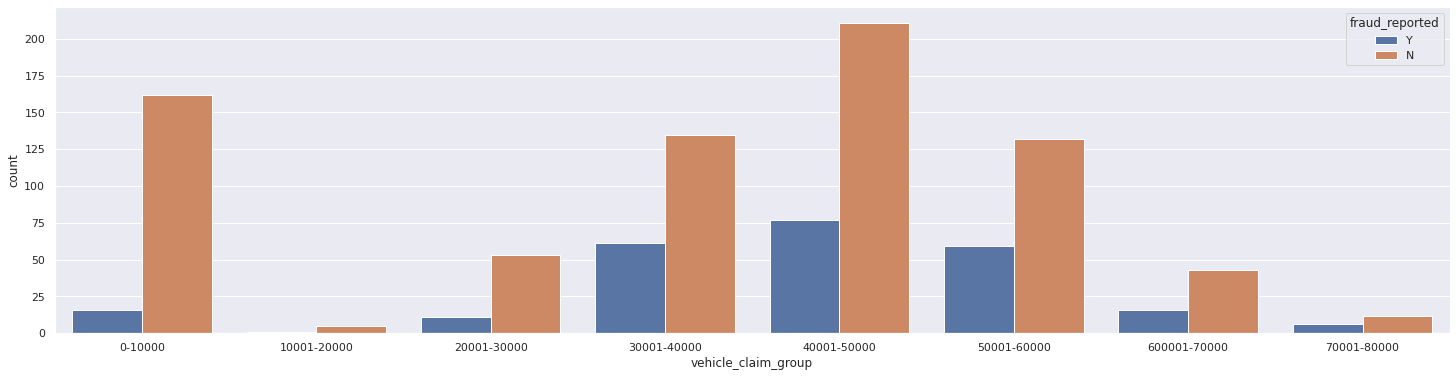

In [ ]:
#### vehicle_claim #####

bins = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000]
bin_labels = ['0-10000', '10001-20000', '20001-30000', '30001-40000', '40001-50000', '50001-60000', '600001-70000', '70001-80000']
data_num['vehicle_claim_group'] = pd.cut(data_num['vehicle_claim'], bins = bins, labels = bin_labels, include_lowest = True)

sns.countplot(data_num["vehicle_claim_group"],orient='v',hue=data['fraud_reported'])

In [ ]:
# tabla de contingencia en porcentajes relativos segun categoria
pd.crosstab(index=data['fraud_reported'], columns=data_num['vehicle_claim_group']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0)

vehicle_claim_group    0-10000  10001-20000  20001-30000  30001-40000  \
fraud_reported                                                          
N                    91.011236    83.333333      82.8125    68.877551   
Y                     8.988764    16.666667      17.1875    31.122449   

vehicle_claim_group  40001-50000  50001-60000  600001-70000  70001-80000  
fraud_reported                                                            
N                      73.263889    69.109948     72.881356    66.666667  
Y                      26.736111    30.890052     27.118644    33.333333

Para la variable vehicle_claim, entre 0 y 10000 existe una menor probabilidad de registrar fraude, solo un 8.9%. entre los rangos superiores bordea la probabilidad entre un 16.6% y un 33.3%

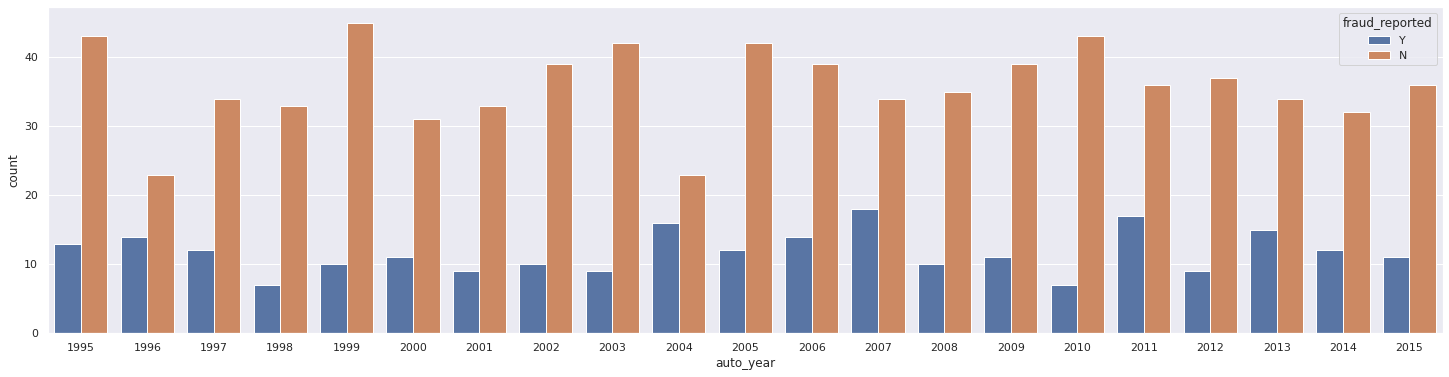

In [ ]:
#### auto_year #####

sns.countplot(data_num["auto_year"],orient='v',hue=data['fraud_reported'])

In [ ]:
# tabla de contingencia en porcentajes relativos segun categoria
pd.crosstab(index=data['fraud_reported'], columns=data_num['auto_year']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0)

auto_year            1995       1996       1997  1998       1999       2000  \
fraud_reported                                                                
N               76.785714  62.162162  73.913043  82.5  81.818182  73.809524   
Y               23.214286  37.837838  26.086957  17.5  18.181818  26.190476   

auto_year            2001       2002       2003       2004       2005  \
fraud_reported                                                          
N               78.571429  79.591837  82.352941  58.974359  77.777778   
Y               21.428571  20.408163  17.647059  41.025641  22.222222   

auto_year            2006       2007       2008  2009  2010       2011  \
fraud_reported                                                           
N               73.584906  65.384615  77.777778  78.0  86.0  67.924528   
Y               26.415094  34.615385  22.222222  22.0  14.0  32.075472   

auto_year            2012       2013       2014       2015  
fraud_reported                                              
N               80.434783  69.387755  72.727273  76.595745  
Y               19.565217  30.612245  27.272727  23.404255

Para la variable auto_year, no podemos visualizar que exista alguna tendencia de antiguedad en relación a reportes de fraude. Solo se aprecia el año 2004 con la mayor tendencia para que exista fraude.

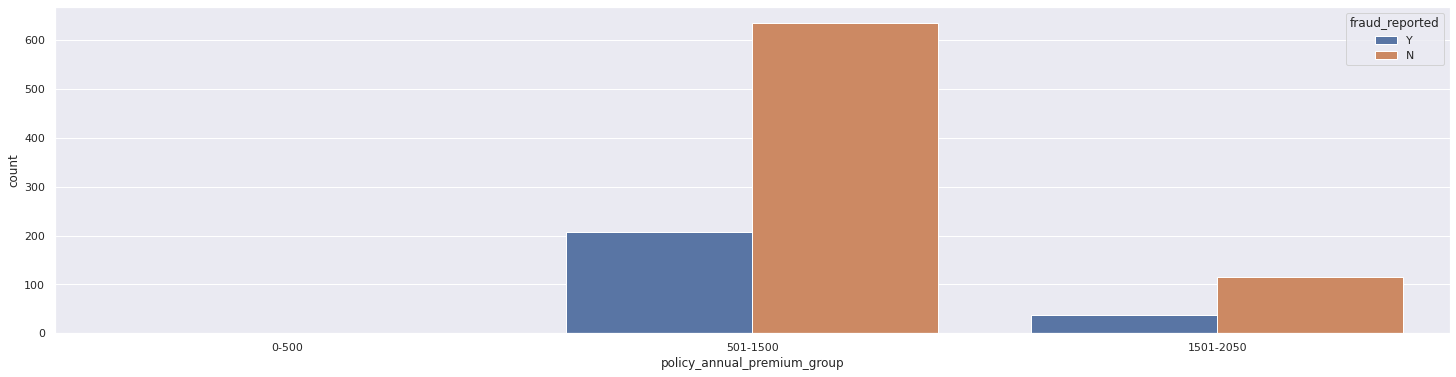

In [ ]:
#### policy_annual_premium #####

bins = [0, 500, 1500, 2050] 
bin_labels = ['0-500', '501-1500', '1501-2050']
data_num['policy_annual_premium_group'] = pd.cut(data_num['policy_annual_premium'], bins = bins, labels = bin_labels, include_lowest = True)

sns.countplot(data_num["policy_annual_premium_group"],orient='v',hue=data['fraud_reported'])

In [ ]:
# tabla de contingencia en porcentajes relativos segun categoria
pd.crosstab(index=data['fraud_reported'], columns=data_num['policy_annual_premium_group']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0)

policy_annual_premium_group  0-500  501-1500  1501-2050
fraud_reported                                         
N                             50.0  75.35545  75.324675
Y                             50.0  24.64455  24.675325

Para la policy_annual_premium no existen diferencias relevantes entre aquellos que realizan fraude.

## 3.3.- Combinaciones de variables

In [ ]:
# Variables numéricas 
data_num = pd.concat([data.select_dtypes(include = ['int64']), data.select_dtypes(include = ['float64'])], axis = 1)

In [ ]:
# Combinación 1
datos_categoricos=[ 'incident_type',
                    'incident_severity',
                    'authorities_contacted',
                    'policy_state',
                    'policy_csl',
                    'collision_type',
                    'property_damage',
                    'police_report_available']
datos_numericos=[   'age',
                    'number_of_vehicles_involved',
                    'vehicle_claim',
                    'policy_deductable']
datTem=[]
for datosCat in datos_categoricos:
    for col in datos_numericos:
        for col2 in datos_numericos:
            if col != col2:
                if col2 not in datTem: 
                    fig=px.scatter(data,x=col2,y=col,facet_col=datosCat,
                                   color='fraud_reported',marginal_x='histogram',
                                   marginal_y='histogram',trendline="ols")
                    fig.show()
        datTem.append(col)
    datTem=[]


**Comentarios:**

A continuación analizaremos algunos gráficos con información de grupos de usuarios que han cometido fraude. 

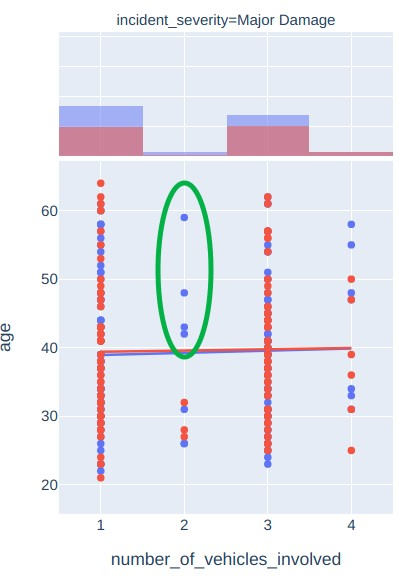

La imagen anterios nos revela un grupo que ha cometido fraude, siendo aquellas personas de más de 40 años, que han registrado 2 vehiculos involucrados y incident severity, Major Damage.

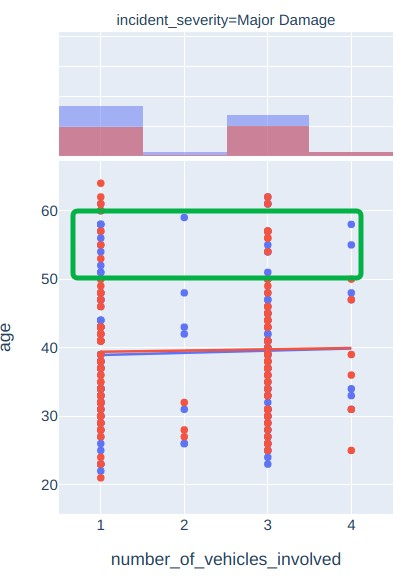

La imagen anterior nos indica que puede existir una mayor tendencia a cometer fraude en aquellas personas mayores a 50 años, incident severity igual a Major Damage y number of vehicles involved igual a 1, 2 o 4.

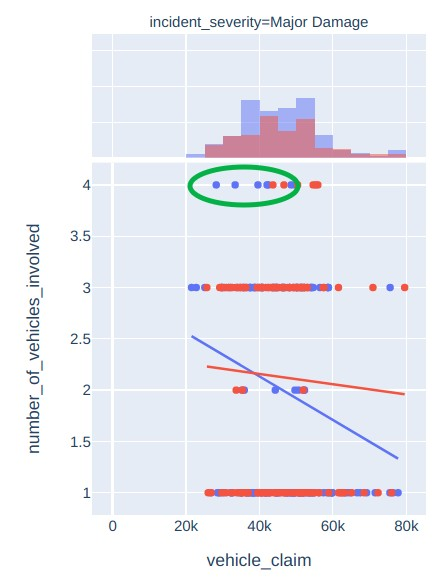

La imagen anterior nos muestra a un grupo con mucha tendencia a cometer fraude, los cuales son aquellos que registra number of vehicles involved igual a 4, con vehicle claim entre 30k y 50k y incident severity igual a Major Damage.

In [ ]:
#Análisis más detallado

datos_categoricos=[ 'incident_type',
                    'incident_severity',
                    'collision_type'
                    ]
datos_numericos=[   'age',
                    'number_of_vehicles_involved',
                    'vehicle_claim'
                    ]
datTem=[]
for datosCat in datos_categoricos:
    for col in datos_numericos:
        for col2 in datos_numericos:
            if col != col2:
                if col2 not in datTem: 
                    fig = px.scatter_3d(data, x = col2, y = col, 
                                        z = datosCat, color = 'fraud_reported') 
                    fig.show()
        datTem.append(col)
    datTem=[]

**Comentarios:**

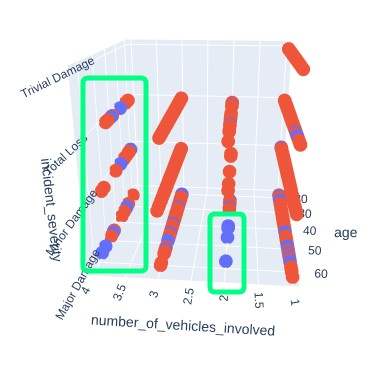

Como podemos observar en la imagen anterior, vemos que para *number of vehicles involved* igual a 4, en torno a cualquier edad y cualquier opción de *incident severity*, existe una gran tendencia a que exista fraude. 
También podemos observar y ratificar un comentario anterior, que para un *number of vehicles involved* igual a 2, mayor a 40 años y *incident severity* igual a *Major Damge* existe una gran tendencia a realizar fraude en seguros de automóviles.

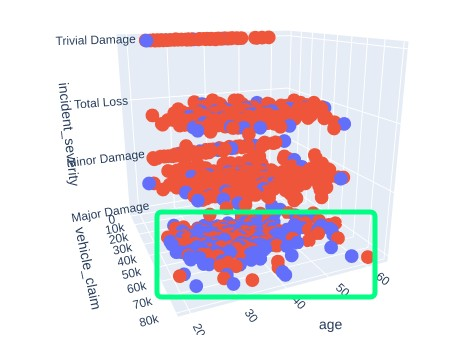

El gráfico anterior nos sigue demostrando que existe una gran tendencia a realizar fraude cuando se registra en *Incident Severity* igual a *Major Damage*, en donde se ve que no importando la edad o los montos de la clase vehicle claim se genera una inclinación al fraude.

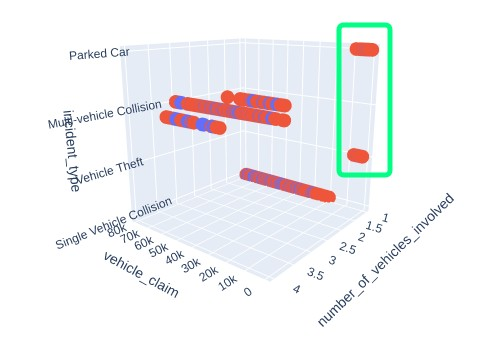

En la imagen anterior, podemos observar que aquellos incidentes que registran 1 vehiculo involucrado, con un monto inferior a 10.000 en Vehicle Claim, existe una gran tendencia a que no se registren fraude en el sinistro.

# 4.- Limpieza y trasformación de datos


In [ ]:
# Reemplazamos los valores ? en NaN
data = data.replace("?",np.NaN)

In [ ]:
# Detectamos los valores NaN reemplazados anteriormente
data.isna().sum().sort_values()

months_as_customer                0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
fraud_reported                    0
number_of_vehicles_involved       0
bodily_injuries                   0
witnesses                         0
auto_model                        0
total_claim_amount                0
injury_claim                      0
property_claim                    0
auto_year                         0
incident_type                     0
incident_date                     0
capital-loss                      0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                 

In [ ]:
#### collision_type ####
# Para la variable "collision_type", veremos cuales son los valores más comunes
round(100*(data['collision_type'].value_counts(normalize=True,dropna=False)),2)

Rear Collision     29.2
Side Collision     27.6
Front Collision    25.4
NaN                17.8
Name: collision_type, dtype: float64

In [ ]:
# Reemplazamos por el valor mas frecuente, como vimos antes, el valor será "Rear Collision"
data['collision_type'].fillna( data['collision_type'].mode()[0], inplace = True )

In [ ]:
#### police_report_available ####
# Para la variable "police_report_available", veremos cuales son los valores más comunes
round(100*(data['police_report_available'].value_counts(normalize=True,dropna=False)),2)

NaN    34.3
NO     34.3
YES    31.4
Name: police_report_available, dtype: float64

In [ ]:
# Como el valor más frecuente es NO, entonces los los valores NaN los reemplazamos por ese valor
data['police_report_available'].fillna('NO', inplace = True) 

In [ ]:
#### property_damage ####
# Para la variable "property_damage", veremos cuales son los valores más comunes
round(100*(data['property_damage'].value_counts(normalize=True,dropna=False)),2)

NaN    36.0
NO     33.8
YES    30.2
Name: property_damage, dtype: float64

In [ ]:
# Como el valor más frecuente es NO, entonces los los valores NaN los reemplazamos por ese valor
data['property_damage'].fillna('NO', inplace = True)

In [ ]:
# Transformamos a datetime 
data['policy_bind_date'] = pd.to_datetime(data['policy_bind_date'], format="%Y-%m-%d")
data['incident_date'] = pd.to_datetime(data['incident_date'], format="%Y-%m-%d")

In [ ]:
# Creamos una nueva columna la cual es la diferencia en días entre la fecha del incidente y la union a la poliza
# y se dejará el tiempo en año

data['tiempoEnPoliza'] = (data['incident_date'] - data['policy_bind_date']).dt.days
data['tiempoEnPoliza'] = round(data['tiempoEnPoliza']/365) # transformamos a año

In [ ]:
# Eliminamos las columnas 'Fecha union de poliza' y 'fecha del incidente'
# ya que obtuvimos una nueva columna en base a estas dos

data.drop(["policy_bind_date","incident_date"],axis=1,inplace=True)

In [ ]:
# Eliminamos la columna _39, ya que no contiene informacion
data.drop(["_c39"],axis=1,inplace=True)

In [ ]:
# Revisamos los valores unicos que contiene cada variable
data.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage                   2
bodily_injuries                   3
witnesses                   

In [ ]:
# Se eliminará algunas variables que no son necesarias
# policy_number: este numero es unico y no ayudará en nada en los modelos
# insured_zip: Lo códigos postales de los asegurados son demasiados variados, por lo que no aportará en el modelo
# incident_location: Las localidades de los incidente son demasiados variados, por lo que no aportará en el modelo 

data.drop(['policy_number','insured_zip','incident_location'], inplace = True, axis = 1)

In [ ]:
# auto_model: podemos dejar la variable auto_make, ya que una depende de la otra

data.drop(['auto_model'], inplace = True, axis = 1)

In [ ]:
# En el gráfico de correlación vimos que existe una gran correlación entre la variable total_claim_amount, con las variables 
# injury_claim, property_claim, vehicle_claim, esto es debido a que la suma total de las 3 variables es el valor de total_claim_amount,
# por lo tanto, se eliminará la variable total_claim_amount.

data.drop(['total_claim_amount'], inplace = True, axis = 1)

In [ ]:
# Tambien observamos en el gráfico de correlación que entre las variables age y months_as_customer existe un gran nivel de correlación, 
# por lo que eliminaremos la variable age

data.drop(['age'], inplace = True, axis = 1)

In [ ]:
# Revisamos si existen inconsistencias en variables numericas, en donde su valor sea menor a cero

print(data[data['months_as_customer'] < 0].shape[0], "months_as_customer")
print(data[data['policy_annual_premium'] < 0].shape[0], "policy_annual_premium")
print(data[data['umbrella_limit'] < 0].shape[0], "umbrella_limit")
print(data[data['capital-gains'] < 0].shape[0], "capital")
print(data[data['number_of_vehicles_involved'] < 0].shape[0], "number_of_vehicles_involved")
print(data[data['injury_claim'] < 0].shape[0], "injury_claim")
print(data[data['property_claim'] < 0].shape[0], "property_claim")
print(data[data['vehicle_claim'] < 0].shape[0], "vehicle_claim")

0 months_as_customer
0 policy_annual_premium
1 umbrella_limit
0 capital
0 number_of_vehicles_involved
0 injury_claim
0 property_claim
0 vehicle_claim


In [ ]:
# Como podemos observar, la variable umbrella_limit contiene un registro con inconsistencia:

data[data['umbrella_limit'] < 0]

months_as_customer policy_state policy_csl  policy_deductable  \
290                 284           OH    100/300                500   

     policy_annual_premium  umbrella_limit insured_sex  \
290                1338.54        -1000000        MALE   

    insured_education_level insured_occupation insured_hobbies  \
290               Associate  machine-op-inspct        kayaking   

    insured_relationship  capital-gains  capital-loss  \
290                 wife              0             0   

                incident_type  collision_type incident_severity  \
290  Single Vehicle Collision  Side Collision      Major Damage   

    authorities_contacted incident_state incident_city  \
290             Ambulance             NC     Arlington   

     incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
290                        13                            1             YES   

     bodily_injuries  witnesses police_report_available  injury_claim  \
290                0          1                      NO          8560   

     property_claim  vehicle_claim  auto_make  auto_year fraud_reported  \
290           17120          68480  Chevrolet       1996              N   

     tiempoEnPoliza  
290            20.0

In [ ]:
# Lo modificamos por el valor más común

data.loc[data['umbrella_limit'] < 0, 'umbrella_limit'] = data[data['umbrella_limit'] > 0]['umbrella_limit'].mode()[0]

## Outliers

Luego de revisar, no se logró detectar valores atípicos en la data.

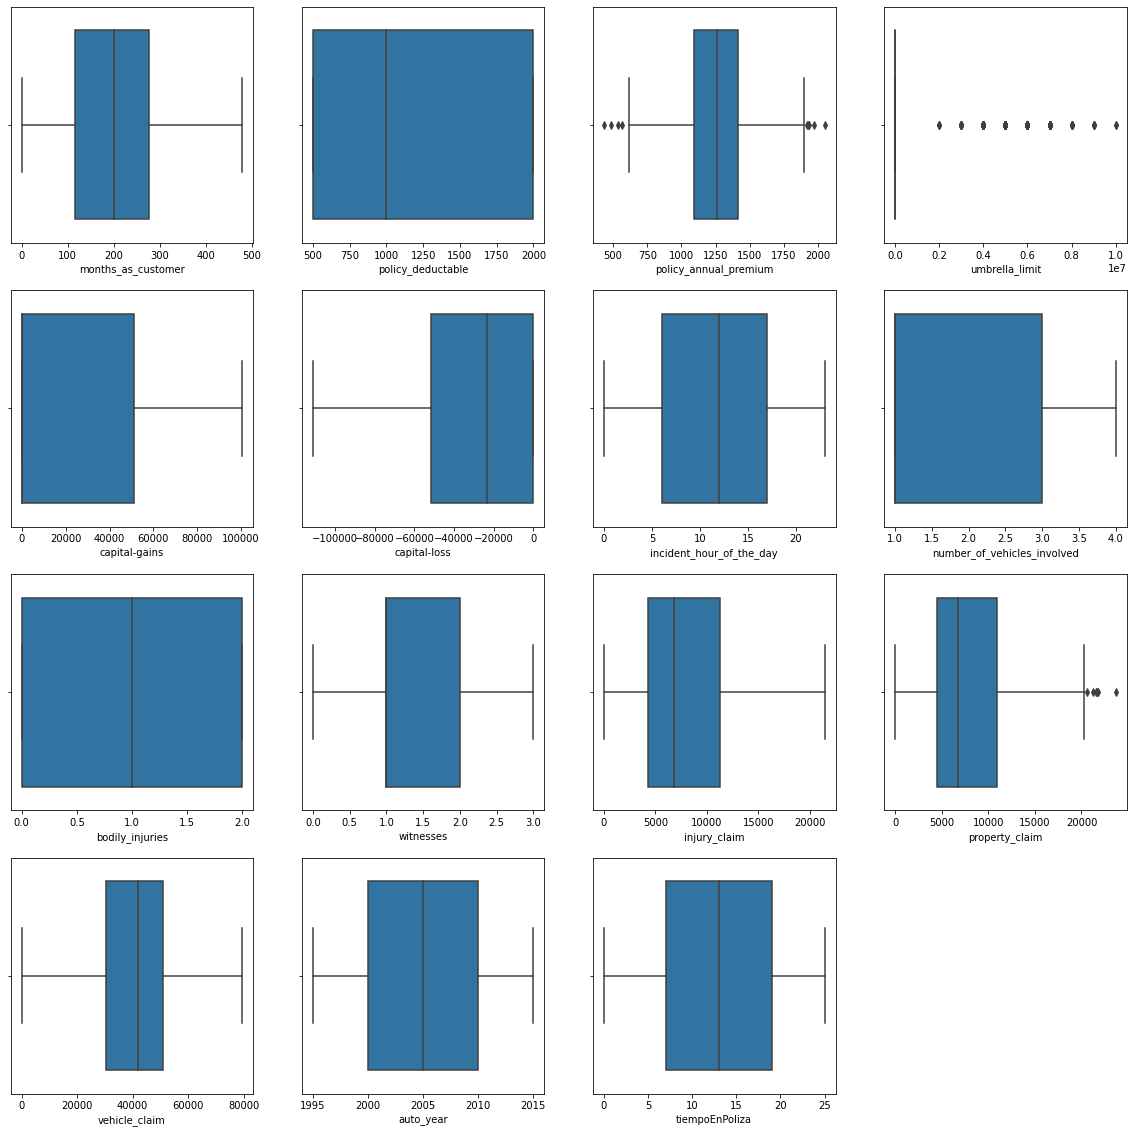

In [ ]:
# Analizamos los Outliers
import warnings
warnings.filterwarnings("ignore")


plt.figure(figsize=[20,20])

num_col= data.describe().columns.to_list()
c=1
for i in num_col:
    plt.subplot(4, 4, c)
    plt.xlabel(i)
    sns.boxplot(data[i])
    c = c + 1
    
plt.show()

## Transformación de categórico a numérico

In [ ]:
# Primero transformamos la variable dependiente. 
# Y = 1
# N = 0

data['fraud_reported'] = data['fraud_reported'].apply(lambda x: 1 if x=='Y' else 0)


In [ ]:
# Seleccionamos las variables categoricas

data_cat= data.select_dtypes(include = ['object'])

In [ ]:
#################    ojo acá, puede que sea necesario eliminar insured_hobbies ##############################
# por tener demasiados valores


data_cat.nunique()

policy_state                3
policy_csl                  3
insured_sex                 2
insured_education_level     7
insured_occupation         14
insured_hobbies            20
insured_relationship        6
incident_type               4
collision_type              3
incident_severity           4
authorities_contacted       5
incident_state              7
incident_city               7
property_damage             2
police_report_available     2
auto_make                  14
dtype: int64

In [ ]:
# Convertimos a variables dummy

data_cat = pd.get_dummies(data_cat, drop_first = True)
data_cat.head()

policy_state_IN  policy_state_OH  policy_csl_250/500  policy_csl_500/1000  \
0                0                1                   1                    0   
1                1                0                   1                    0   
2                0                1                   0                    0   
3                0                0                   1                    0   
4                0                0                   0                    1   

   insured_sex_MALE  insured_education_level_College  \
0                 1                                0   
1                 1                                0   
2                 0                                0   
3                 0                                0   
4                 1                                0   

   insured_education_level_High School  insured_education_level_JD  \
0                                    0                           0   
1                                    0                           0   
2                                    0                           0   
3                                    0                           0   
4                                    0                           0   

   insured_education_level_MD  insured_education_level_Masters  \
0                           1                                0   
1                           1                                0   
2                           0                                0   
3                           0                                0   
4                           0                                0   

   insured_education_level_PhD  insured_occupation_armed-forces  \
0                            0                                0   
1                            0                                0   
2                            1                                0   
3                            1                                1   
4                            0                                0   

   insured_occupation_craft-repair  insured_occupation_exec-managerial  \
0                                1                                   0   
1                                0                                   0   
2                                0                                   0   
3                                0                                   0   
4                                0                                   0   

   insured_occupation_farming-fishing  insured_occupation_handlers-cleaners  \
0                                   0                                     0   
1                                   0                                     0   
2                                   0                                     0   
3                                   0                                     0   
4                                   0                                     0   

   insured_occupation_machine-op-inspct  insured_occupation_other-service  \
0                                     0                                 0   
1                                     1                                 0   
2                                     0                                 0   
3                                     0                                 0   
4                                     0                                 0   

   insured_occupation_priv-house-serv  insured_occupation_prof-specialty  \
0                                   0                                  0   
1                                   0                                  0   
2                                   0                                  0   
3                                   0                                  0   
4                                   0                                  0   

   insured_occupation_protective-serv  insured_occupation_sales  \
0                                   0                    

## Escalar

In [ ]:
# seleccionamos los datos numericos

data_num = pd.concat([data.select_dtypes(include = ['int64']), data.select_dtypes(include = ['float64'])], axis = 1)  
data_num = data_num.drop('fraud_reported', axis = 1) # no concideramos la variable dependiente
data_num.head()

months_as_customer  policy_deductable  umbrella_limit  capital-gains  \
0                 328               1000               0          53300   
1                 228               2000         5000000              0   
2                 134               2000         5000000          35100   
3                 256               2000         6000000          48900   
4                 228               1000         6000000          66000   

   capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
0             0                         5                            1   
1             0                         8                            1   
2             0                         7                            3   
3        -62400                         5                            1   
4        -46000                        20                            1   

   bodily_injuries  witnesses  injury_claim  property_claim  vehicle_claim  \
0                1          2          6510           13020          52080   
1                0          0           780             780           3510   
2                2          3          7700            3850          23100   
3                1          2          6340            6340          50720   
4                0          1          1300             650           4550   

   auto_year  policy_annual_premium  tiempoEnPoliza  
0       2004                1406.91             0.0  
1       2007                1197.22             9.0  
2       2007                1413.14            14.0  
3       2014                1415.74            25.0  
4       2009                1583.91             1.0

In [ ]:
# Escalamos los datos

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaler_num = scaler.fit_transform(data_num)
data_scaler_num = pd.DataFrame(data = data_scaler_num, columns = data_num.columns, index = data.index)
data_scaler_num.head()

months_as_customer  policy_deductable  umbrella_limit  capital-gains  \
0            1.078140          -0.222383       -0.481633       1.011331   
1            0.208995           1.412784        1.691800      -0.901927   
2           -0.608002           1.412784        1.691800       0.358023   
3            0.452355           1.412784        2.126487       0.853388   
4            0.208995          -0.222383        2.126487       1.467210   

   capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
0      0.953851                 -0.956261                    -0.823865   
1      0.953851                 -0.524475                    -0.823865   
2      0.953851                 -0.668404                     1.140056   
3     -1.267577                 -0.956261                    -0.823865   
4     -0.683741                  1.202666                    -0.823865   

   bodily_injuries  witnesses  injury_claim  property_claim  vehicle_claim  \
0         0.009759   0.461838     -0.189283        1.165505       0.749653   
1        -1.210174  -1.338700     -1.363822       -1.372696      -1.823346   
2         1.229693   1.362107      0.054644       -0.736072      -0.785565   
3         0.009759   0.461838     -0.224130       -0.219722       0.677607   
4        -1.210174  -0.438431     -1.257232       -1.399654      -1.768252   

   auto_year  policy_annual_premium  tiempoEnPoliza  
0  -0.183440               0.616705       -1.764475  
1   0.315491              -0.242521       -0.541504  
2   0.315491               0.642233        0.137924  
3   1.479664               0.652886        1.632666  
4   0.648112               1.341980       -1.628590

# 5.- Balanceo y Selección de variables

In [ ]:
# Variables independientes
X_original = pd.concat([data_scaler_num, data_cat], axis = 1)
X_original.head()

months_as_customer  policy_deductable  umbrella_limit  capital-gains  \
0            1.078140          -0.222383       -0.481633       1.011331   
1            0.208995           1.412784        1.691800      -0.901927   
2           -0.608002           1.412784        1.691800       0.358023   
3            0.452355           1.412784        2.126487       0.853388   
4            0.208995          -0.222383        2.126487       1.467210   

   capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
0      0.953851                 -0.956261                    -0.823865   
1      0.953851                 -0.524475                    -0.823865   
2      0.953851                 -0.668404                     1.140056   
3     -1.267577                 -0.956261                    -0.823865   
4     -0.683741                  1.202666                    -0.823865   

   bodily_injuries  witnesses  injury_claim  property_claim  vehicle_claim  \
0         0.009759   0.461838     -0.189283        1.165505       0.749653   
1        -1.210174  -1.338700     -1.363822       -1.372696      -1.823346   
2         1.229693   1.362107      0.054644       -0.736072      -0.785565   
3         0.009759   0.461838     -0.224130       -0.219722       0.677607   
4        -1.210174  -0.438431     -1.257232       -1.399654      -1.768252   

   auto_year  policy_annual_premium  tiempoEnPoliza  policy_state_IN  \
0  -0.183440               0.616705       -1.764475                0   
1   0.315491              -0.242521       -0.541504                1   
2   0.315491               0.642233        0.137924                0   
3   1.479664               0.652886        1.632666                0   
4   0.648112               1.341980       -1.628590                0   

   policy_state_OH  policy_csl_250/500  policy_csl_500/1000  insured_sex_MALE  \
0                1                   1                    0                 1   
1                0                   1                    0                 1   
2                1                   0                    0                 0   
3                0                   1                    0                 0   
4                0                   0                    1                 1   

   insured_education_level_College  insured_education_level_High School  \
0                                0                                    0   
1                                0                                    0   
2                                0                                    0   
3                                0                                    0   
4                                0                                    0   

   insured_education_level_JD  insured_education_level_MD  \
0                           0                           1   
1                           0                           1   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   insured_education_level_Masters  insured_education_level_PhD  \
0                                0                            0   
1                                0                            0   
2                                0                            1   
3                                0                            1   
4                                0                            0   

   insured_occupation_armed-forces  insured_occupation_craft-repair  \
0                                0                                1   
1                                0                                0   
2                                0                                0   
3                                1                                0   
4                                0                                0   

   insured_occupation_exec-managerial  insured_occupation_farming-fish

In [ ]:
X_original.shape

(1000, 102)

In [ ]:
# Variable dependiente
y_original = pd.concat([data.select_dtypes(include = ['int64']), data.select_dtypes(include = ['float64'])], axis = 1)['fraud_reported']
y_original.head()

0    1
1    1
2    0
3    1
4    0
Name: fraud_reported, dtype: int64

## Balanceo

En la fase de *Descripción de Datos* se detectó que existe un desbalance en la variable objetivo, esto debido a que existe una mayor cantidad de datos etiquetados como No Fraudulentos, en comparación con los datos etiquetados como Fraudes.

In [ ]:
# Equilibramos la distribución de clases

from imblearn.combine import SMOTETomek 

smt = SMOTETomek(random_state=42)
X, y = smt.fit_resample(X_original, y_original)

## Algoritmo Boruta

In [ ]:
# Utilizaremos el algoritmo Boruta

from boruta import BorutaPy
from sklearn.ensemble import RandomForestRegressor

columnas = list(X.columns.values)

forest = RandomForestRegressor(
   n_jobs = -1, 
   max_depth = 5
)

boruta = BorutaPy(
   estimator = forest, 
   n_estimators = 'auto',
   max_iter = 200 # numero de iteraciones que implementaremos
)

### fit Boruta (debemos enviarle un array)
boruta.fit(np.array(X), np.array(y))

# Resultados 
# green_area: variables aceptadas automáticamante
# blue_area: Variables que se deben revisar manualmente y decidir si se incluyen
green_area = X.columns[boruta.support_].to_list()
blue_area = X.columns[boruta.support_weak_].to_list()
print('Las variables aceptadas automáticamente son:', green_area)
print('Las variables que se deben analizar manualmente son:', blue_area)

Las variables aceptadas automáticamente son: ['months_as_customer', 'property_claim', 'insured_hobbies_chess', 'insured_hobbies_cross-fit', 'insured_relationship_own-child', 'incident_severity_Minor Damage', 'incident_severity_Total Loss', 'incident_severity_Trivial Damage']
Las variables que se deben analizar manualmente son: ['insured_hobbies_sleeping']


In [ ]:
atrib = boruta.support_
atributos_Boruta = [columnas[i] for i in list(atrib.nonzero()[0])]
atributos_Boruta

['months_as_customer',
 'property_claim',
 'insured_hobbies_chess',
 'insured_hobbies_cross-fit',
 'insured_relationship_own-child',
 'incident_severity_Minor Damage',
 'incident_severity_Total Loss',
 'incident_severity_Trivial Damage']

In [ ]:
# Si existen atributos que se deben analizar y seleccionar manualmente,
# se concatenaran con los seleccionado automáticamente por el algoritmo
atributos_Boruta_IncluyeManual = []
if len(X.columns[boruta.support_weak_].to_list()) > 0:
    atrib2 = boruta.support_weak_
    atributos_Boruta_IncluyeManual += [columnas[i] for i in list(atrib2.nonzero()[0])]
    print(atributos_Boruta_IncluyeManual)
else:
    print("La lista de atributos para selección manual es vacia.")

['insured_hobbies_sleeping']


## SelectFromModel

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
columnas = list(X.columns.values)

selector = SelectFromModel(estimator=LogisticRegression()).fit(X, y)

#print('Coeficientes obtenidos por variable', selector.estimator_.coef_)
#print('La variables seleccionadas son: ', X.columns[selector.get_support()].to_list())
print('Limite: ', selector.threshold_)


Limite:  0.6290425203028702


In [ ]:
atrib = selector.get_support()
atributos_SelectFromModel = [columnas[i] for i in list(atrib.nonzero()[0])]
atributos_SelectFromModel

['insured_occupation_armed-forces',
 'insured_occupation_handlers-cleaners',
 'insured_occupation_machine-op-inspct',
 'insured_occupation_other-service',
 'insured_occupation_priv-house-serv',
 'insured_occupation_prof-specialty',
 'insured_occupation_protective-serv',
 'insured_occupation_sales',
 'insured_occupation_tech-support',
 'insured_hobbies_basketball',
 'insured_hobbies_bungie-jumping',
 'insured_hobbies_camping',
 'insured_hobbies_chess',
 'insured_hobbies_cross-fit',
 'insured_hobbies_dancing',
 'insured_hobbies_exercise',
 'insured_hobbies_golf',
 'insured_hobbies_hiking',
 'insured_hobbies_kayaking',
 'insured_hobbies_movies',
 'insured_hobbies_paintball',
 'insured_hobbies_reading',
 'insured_hobbies_skydiving',
 'insured_hobbies_sleeping',
 'insured_hobbies_video-games',
 'incident_type_Parked Car',
 'incident_severity_Minor Damage',
 'incident_severity_Total Loss',
 'incident_severity_Trivial Damage',
 'authorities_contacted_None',
 'incident_state_NY',
 'incident_st

## SelectKBest - Algoritmo univariante que aplica el método de filtrado

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
columnas = list(X.columns.values)


In [ ]:
k = 50  # número de atributos a seleccionar (Indicamos cuales son los 50 atributos más relevantes)
seleccionadas = SelectKBest(f_classif, k=k).fit(X, y)
atrib = seleccionadas.get_support()
atributos_SelectKBest_50 = [columnas[i] for i in list(atrib.nonzero()[0])]
atributos_SelectKBest_50

['property_claim',
 'vehicle_claim',
 'policy_state_IN',
 'policy_state_OH',
 'policy_csl_500/1000',
 'insured_sex_MALE',
 'insured_education_level_High School',
 'insured_education_level_JD',
 'insured_education_level_Masters',
 'insured_occupation_handlers-cleaners',
 'insured_occupation_other-service',
 'insured_occupation_priv-house-serv',
 'insured_occupation_prof-specialty',
 'insured_occupation_protective-serv',
 'insured_hobbies_bungie-jumping',
 'insured_hobbies_camping',
 'insured_hobbies_chess',
 'insured_hobbies_cross-fit',
 'insured_hobbies_dancing',
 'insured_hobbies_exercise',
 'insured_hobbies_golf',
 'insured_hobbies_kayaking',
 'insured_hobbies_movies',
 'insured_relationship_own-child',
 'insured_relationship_unmarried',
 'incident_type_Parked Car',
 'incident_type_Vehicle Theft',
 'collision_type_Rear Collision',
 'collision_type_Side Collision',
 'incident_severity_Minor Damage',
 'incident_severity_Total Loss',
 'incident_severity_Trivial Damage',
 'authorities_co

In [ ]:
k = 30  # número de atributos a seleccionar (Indicamos cuales son los 30 atributos más relevantes)
seleccionadas = SelectKBest(f_classif, k=k).fit(X, y)
atrib = seleccionadas.get_support()
atributos_SelectKBest_30 = [columnas[i] for i in list(atrib.nonzero()[0])]
atributos_SelectKBest_30

['property_claim',
 'vehicle_claim',
 'policy_csl_500/1000',
 'insured_education_level_High School',
 'insured_education_level_JD',
 'insured_occupation_priv-house-serv',
 'insured_hobbies_camping',
 'insured_hobbies_chess',
 'insured_hobbies_dancing',
 'insured_hobbies_golf',
 'insured_hobbies_kayaking',
 'insured_relationship_own-child',
 'incident_type_Parked Car',
 'incident_type_Vehicle Theft',
 'collision_type_Rear Collision',
 'incident_severity_Minor Damage',
 'incident_severity_Total Loss',
 'incident_severity_Trivial Damage',
 'authorities_contacted_None',
 'authorities_contacted_Police',
 'incident_state_NY',
 'incident_state_WV',
 'incident_city_Northbend',
 'incident_city_Northbrook',
 'incident_city_Riverwood',
 'property_damage_YES',
 'police_report_available_YES',
 'auto_make_Jeep',
 'auto_make_Nissan',
 'auto_make_Toyota']

In [ ]:
k = 15  # número de atributos a seleccionar (Indicamos cuales son los 15 atributos más relevantes)
seleccionadas = SelectKBest(f_classif, k=k).fit(X, y)
atrib = seleccionadas.get_support()
atributos_SelectKBest_15 = [columnas[i] for i in list(atrib.nonzero()[0])]
atributos_SelectKBest_15

['vehicle_claim',
 'policy_csl_500/1000',
 'insured_education_level_High School',
 'insured_relationship_own-child',
 'incident_type_Parked Car',
 'incident_type_Vehicle Theft',
 'collision_type_Rear Collision',
 'incident_severity_Minor Damage',
 'incident_severity_Total Loss',
 'incident_severity_Trivial Damage',
 'authorities_contacted_None',
 'authorities_contacted_Police',
 'incident_state_NY',
 'incident_state_WV',
 'property_damage_YES']

In [ ]:
k = 8  # número de atributos a seleccionar (Indicamos cuales son los 8 atributos más relevantes)
seleccionadas = SelectKBest(f_classif, k=k).fit(X, y)
atrib = seleccionadas.get_support()
atributos_SelectKBest_8 = [columnas[i] for i in list(atrib.nonzero()[0])]
atributos_SelectKBest_8

['vehicle_claim',
 'incident_type_Parked Car',
 'incident_severity_Minor Damage',
 'incident_severity_Total Loss',
 'incident_severity_Trivial Damage',
 'authorities_contacted_None',
 'authorities_contacted_Police',
 'incident_state_WV']

## RFE - Eliminación Recursiva de atributos

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE

# Algoritmo de Eliminación Recursiva de atributos con ExtraTrees
modelo = ExtraTreesClassifier()
columnas = list(X.columns.values)

In [ ]:
# Seleccionamos 50 atributos
era = RFE(modelo, n_features_to_select=50, step=1)  # número de atributos a seleccionar
era = era.fit(X, y)

# imprimir resultados
atrib = era.support_
atributos_RFE_50 = [columnas[i] for i in list(atrib.nonzero()[0])]
atributos_RFE_50

['months_as_customer',
 'policy_deductable',
 'umbrella_limit',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year',
 'policy_annual_premium',
 'tiempoEnPoliza',
 'policy_state_IN',
 'policy_state_OH',
 'policy_csl_250/500',
 'policy_csl_500/1000',
 'insured_sex_MALE',
 'insured_education_level_High School',
 'insured_education_level_JD',
 'insured_education_level_MD',
 'insured_education_level_Masters',
 'insured_hobbies_camping',
 'insured_hobbies_chess',
 'insured_hobbies_cross-fit',
 'insured_relationship_own-child',
 'incident_type_Parked Car',
 'incident_type_Single Vehicle Collision',
 'collision_type_Rear Collision',
 'collision_type_Side Collision',
 'incident_severity_Minor Damage',
 'incident_severity_Total Loss',
 'incident_severity_Trivial Damage',
 'authorities_contacted_Fire',
 'authorities_contacted_None',
 'authorities_contact

In [ ]:
# Seleccionamos 30 atributos
era = RFE(modelo, n_features_to_select=30, step=1)  # número de atributos a seleccionar
era = era.fit(X, y)

# imprimir resultados
atrib = era.support_
atributos_RFE_30 = [columnas[i] for i in list(atrib.nonzero()[0])]
atributos_RFE_30

['months_as_customer',
 'policy_deductable',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'bodily_injuries',
 'witnesses',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year',
 'policy_annual_premium',
 'tiempoEnPoliza',
 'policy_csl_500/1000',
 'insured_sex_MALE',
 'insured_education_level_High School',
 'insured_hobbies_chess',
 'insured_hobbies_cross-fit',
 'insured_relationship_own-child',
 'collision_type_Rear Collision',
 'collision_type_Side Collision',
 'incident_severity_Minor Damage',
 'incident_severity_Total Loss',
 'incident_severity_Trivial Damage',
 'authorities_contacted_None',
 'authorities_contacted_Police',
 'incident_state_NY',
 'incident_state_WV',
 'property_damage_YES',
 'police_report_available_YES']

In [ ]:
# Seleccionamos 15 atributos
era = RFE(modelo, n_features_to_select=15, step=1)  # número de atributos a seleccionar
era = era.fit(X, y)

# imprimir resultados
atrib = era.support_
atributos_RFE_15 = [columnas[i] for i in list(atrib.nonzero()[0])]
atributos_RFE_15

['months_as_customer',
 'capital-loss',
 'incident_hour_of_the_day',
 'bodily_injuries',
 'witnesses',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year',
 'policy_annual_premium',
 'tiempoEnPoliza',
 'insured_hobbies_chess',
 'incident_severity_Minor Damage',
 'incident_severity_Total Loss',
 'incident_severity_Trivial Damage']

In [ ]:
# Seleccionamos 8 atributos
era = RFE(modelo, n_features_to_select=8, step=1)  # número de atributos a seleccionar
era = era.fit(X, y)

# imprimir resultados
atrib = era.support_
atributos_RFE_8 = [columnas[i] for i in list(atrib.nonzero()[0])]
atributos_RFE_8

['months_as_customer',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year',
 'tiempoEnPoliza',
 'incident_severity_Minor Damage',
 'incident_severity_Total Loss']

# 6.- Modelos

Después de intensas iteraciones, solo se dejaron los mejores conjuntos de atributos por algoritmo.

### 6.1.- Import e inicialización

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, cohen_kappa_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
# Creamos un dataframe que iremos guardando las evaluaciones
# de esta forma podremos comparar de una facil los distintos 
# conjuntos de atributos
df_evaluacion = pd.DataFrame(columns=["Algoritmo",
                                      "Conjunto_de_Atributos", 
                                      "Accuracy_Entrenamiento", 
                                      "Accuracy_Test", 
                                      "Precision_score",
                                      "Recall_score",
                                      "f1_score",
                                      "cohen_kappa_score",
                                      "AUC_ROC",
                                      "accuracyCrossValidation_mean",
                                      "accuracyCrossValidation_std",
                                      "modelo"
                                      ])

In [ ]:
# Seleccionamos solo las variables seleccionadas
# X_i = X[atributos]

# Obtenemos el conjuto de entrenamiento y el conjunto de pruebas
X_train_o, X_test_o, y_train, y_test = train_test_split(X, y, test_size = 0.25)


# Función que obtiene las métricas de evaluación de los modelos
def evaluacionMetricas( df_evaluacion, atributos, nombre, tipoModelo):
    # Seleccionamos solo el conjunto de atributos seleccionado
    X_train = X_train_o[atributos]
    X_test = X_test_o[atributos]


    # Seleccionamos el tipo de modelo 
    if(tipoModelo == "Regresion Logistica"):
        modelo = LogisticRegression(penalty='none')
        modelo.fit(X = X_train, y = y_train)
        predictions = modelo.predict(X_test)

    elif(tipoModelo == "SVC"):
        modelo = SVC()
        modelo.fit(X_train, y_train)
        predictions = modelo.predict(X_test)

    elif(tipoModelo == "DecisionTreeClassifier"):
        modelo = DecisionTreeClassifier()
        modelo.fit(X_train, y_train)
        predictions = modelo.predict(X_test)

    elif(tipoModelo == "KNeighborsClassifier"):
        modelo = KNeighborsClassifier(n_neighbors = 10)
        modelo.fit(X_train, y_train)
        predictions = modelo.predict(X_test)

    elif(tipoModelo == "GaussianNB"):
        modelo = GaussianNB()
        modelo.fit(X_train, y_train)
        predictions = modelo.predict(X_test)

    elif(tipoModelo == "XgBoost"):
        modelo = XGBClassifier()
        modelo.fit(X_train, y_train)
        predictions = modelo.predict(X_test)

    elif(tipoModelo == "RandomForest"):
        modelo = RandomForestClassifier(max_depth=2, random_state=0)
        modelo.fit(X_train, y_train)
        predictions = modelo.predict(X_test)

    else:
        print("tipoModelo no encontrado")
        return df_evaluacion


    # Medidas de evaluación:

    # Matriz de confusión
    print("")
    print("******* Matriz de Confusión *********")
    print("")
    labels = ['0 - No fraude','1 - Fraude']
    cm = confusion_matrix(y_test, predictions)
    print(cm)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Matriz de Confusión')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Valore previstos')
    plt.ylabel('Valores actuales')
    plt.show()



    #### Curva ROC ####
    
    # Al trazar la tasa positiva verdadera (sensibilidad) frente a la tasa de falsos positivos (1 - especificidad), 
    # obtenemos la curva de Característica Operativa del Receptor (ROC). Esta curva nos permite visualizar el equilibrio 
    # entre la tasa de verdaderos positivos y la tasa falsos positivos.
    # El modelo más eficiente tiene el AUC igual a 1
    print("")
    print("")
    print("******* Curva ROC *********")
    print("")

    auc = roc_auc_score(y_test, predictions)
    print('AUC - Test Set: %.2f%%' % (auc*100))

    # calculate roc curve
    fpr, tpr, thresholds = roc_curve(y_test, predictions)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(fpr, tpr, marker='.')
    plt.xlabel('False positive rate')
    plt.ylabel('Sensitivity/ Recall')
    plt.show()


    
    #### Accuracy ####

    accuracyEntrenamiento = modelo.score(X[atributos], y)
    accuracyTest = accuracy_score(y_test, predictions) # Relación entre las predicciones correctas y el número total de predicciones. Con qué frecuencia es correcto el clasificador.

    #### precision_score ####
    # La precisión es la relación entre las predicciones correctas y el número total de predicciones correctas previstas. 
    # Esto mide la precisión del clasificador a la hora de predecir casos positivo
    precision = precision_score(y_test, predictions)


    #### Recall_score ####
    # La sensibilidad también es llamada en inglés recall, es la relación entre las predicciones positivas correctas y el número total de predicciones positivas. 
    # O más simplemente, cuán sensible es el clasificador para detectar instancias positivas. Esto también se conoce como la tasa verdadera positiva.
    recall = recall_score(y_test, predictions)


    #### f1_score ####
    # La puntuación F1 se puede interpretar como una media armónica entre la precision y recall.
    f1 = f1_score(y_test, predictions)


    #### cohen_kappa_score ####
    # Esta medida tiene por objeto comparar las etiquetas de diferentes anotadores humanos, no un clasificador frente a una realidad fundamental.
    # El puntaje kappa es un número entre -1 y 1. Los puntajes superiores a .8 generalmente se consideran un buen acuerdo; cero o menos significa que no hay acuerdo (etiquetas prácticamente aleatorias).
    kappa = cohen_kappa_score(y_test, predictions)

    #### k-fold cross validation ####
    #  técnica utilizada para evaluar los resultados de un análisis estadístico y garantizar que son independientes de la partición entre datos de entrenamiento y prueba
    accuracyCrossValidation = cross_val_score(estimator=modelo, X= X_train, y=y_train, cv=10)


    # Guardamos los datos obtenidos en un dataframe
    nueva_fila = {'Algoritmo':tipoModelo,
                'Conjunto_de_Atributos': nombre, 
                'Accuracy_Entrenamiento': accuracyEntrenamiento,
                'Accuracy_Test': accuracyTest,
                'Precision_score': precision,
                'Recall_score': recall,
                'f1_score': f1,
                'cohen_kappa_score': kappa,
                'AUC_ROC': auc,
                'accuracyCrossValidation_mean': accuracyCrossValidation.mean(),
                'accuracyCrossValidation_std': accuracyCrossValidation.std(),
                'modelo':modelo
                } # creamos un diccionario
    df_evaluacion = df_evaluacion.append(nueva_fila, ignore_index=True)


    print("")
    print("")
    print("******* Métricas de Evaluación *********")
    print("")
    print("Accuracy de entrenamiento:", accuracyEntrenamiento)
    print("Accuracy de test:", accuracyTest)
    print("precision_score:",precision)
    print("recall_score:",recall)
    print("f1_score:",f1)
    print("cohen_kappa_score:",kappa)
    print('AUC - Test Set: %.2f%%' % (auc*100))
    print('Media accuracyCrossValidation evaluado en 10 modelos: ', accuracyCrossValidation.mean())
    print('Desviancion estandar accuracyCrossValidation evaluado en 10 modelos: ', accuracyCrossValidation.std())

    return df_evaluacion

## 6.2.- SVC

In [ ]:
# Eliminamos del dataframe de metricas los registros de SVC para cargarlos de nuevo
df_evaluacion = df_evaluacion[df_evaluacion["Algoritmo"]!="SVC"]

### Atributos Boruta - SVC

Seleccionamos los atributos obtenidos en la selección de variables por el algoritmo Boruta.


******* Matriz de Confusión *********

[[165  22]
 [ 18 170]]


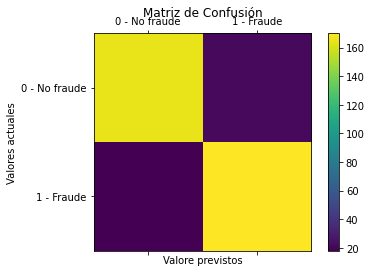



******* Curva ROC *********

AUC - Test Set: 89.33%


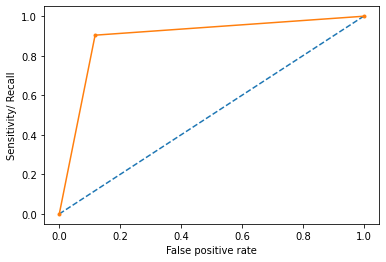



******* Métricas de Evaluación *********

Accuracy de entrenamiento: 0.8813333333333333
Accuracy de test: 0.8933333333333333
precision_score: 0.8854166666666666
recall_score: 0.9042553191489362
f1_score: 0.8947368421052632
cohen_kappa_score: 0.7866530124594641
AUC - Test Set: 89.33%
Media accuracyCrossValidation evaluado en 10 modelos:  0.8710967130214918
Desviancion estandar accuracyCrossValidation evaluado en 10 modelos:  0.012832218440765047


In [ ]:
df_evaluacion = evaluacionMetricas(df_evaluacion, atributos_Boruta, 'atributos_Boruta','SVC')

### Atributos SelectFromModel - SVC

Seleccionamos los atributos obtenidos en la selección de variables por el algoritmo SelectFromModel:


******* Matriz de Confusión *********

[[176  11]
 [ 32 156]]


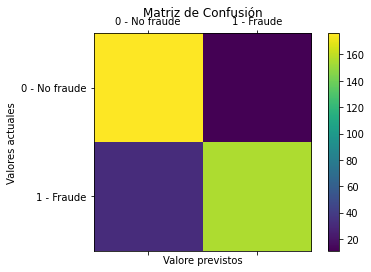



******* Curva ROC *********

AUC - Test Set: 88.55%


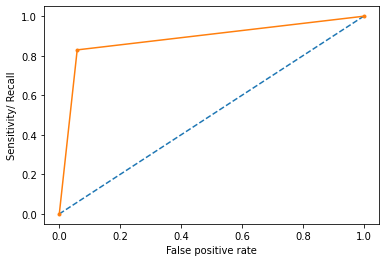



******* Métricas de Evaluación *********

Accuracy de entrenamiento: 0.9273333333333333
Accuracy de test: 0.8853333333333333
precision_score: 0.9341317365269461
recall_score: 0.8297872340425532
f1_score: 0.8788732394366198
cohen_kappa_score: 0.7707335105853582
AUC - Test Set: 88.55%
Media accuracyCrossValidation evaluado en 10 modelos:  0.8746602402022756
Desviancion estandar accuracyCrossValidation evaluado en 10 modelos:  0.022295956176232704


In [ ]:
df_evaluacion = evaluacionMetricas(df_evaluacion, atributos_SelectFromModel, 'atributos_SelectFromModel','SVC')

## 6.3.- Decision Tree Classifier

In [ ]:
# Eliminamos del dataframe de metricas los registros de DecisionTreeClassifier para cargarlos de nuevo
df_evaluacion = df_evaluacion[df_evaluacion["Algoritmo"] != "DecisionTreeClassifier"]

### Atributos atributos_SelectFromModel - DecisionTreeClassifier

Seleccionamos los atributos obtenidos en la selección de variables


******* Matriz de Confusión *********

[[153  34]
 [ 19 169]]


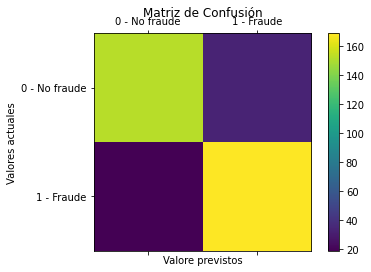



******* Curva ROC *********

AUC - Test Set: 85.86%


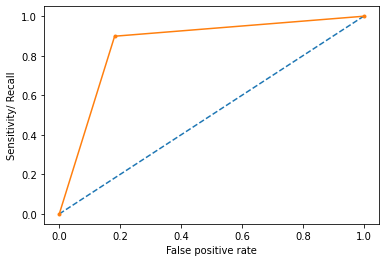



******* Métricas de Evaluación *********

Accuracy de entrenamiento: 0.946
Accuracy de test: 0.8586666666666667
precision_score: 0.8325123152709359
recall_score: 0.898936170212766
f1_score: 0.8644501278772377
cohen_kappa_score: 0.7172710072976087
AUC - Test Set: 85.86%
Media accuracyCrossValidation evaluado en 10 modelos:  0.8497629582806574
Desviancion estandar accuracyCrossValidation evaluado en 10 modelos:  0.018130177738661782


In [ ]:
df_evaluacion = evaluacionMetricas(df_evaluacion, atributos_SelectFromModel, 'atributos_SelectFromModel','DecisionTreeClassifier')

### Atributos atributos_RFE_50 - DecisionTreeClassifier

Seleccionamos los atributos obtenidos en la selección de variables


******* Matriz de Confusión *********

[[153  34]
 [ 24 164]]


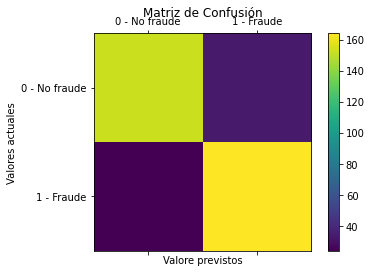



******* Curva ROC *********

AUC - Test Set: 84.53%


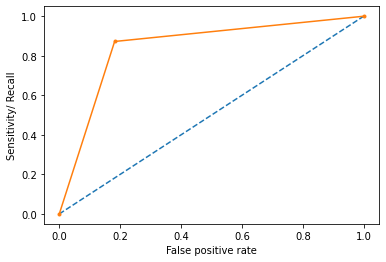



******* Métricas de Evaluación *********

Accuracy de entrenamiento: 0.9613333333333334
Accuracy de test: 0.8453333333333334
precision_score: 0.8282828282828283
recall_score: 0.8723404255319149
f1_score: 0.8497409326424871
cohen_kappa_score: 0.6906204659895878
AUC - Test Set: 84.53%
Media accuracyCrossValidation evaluado en 10 modelos:  0.842628002528445
Desviancion estandar accuracyCrossValidation evaluado en 10 modelos:  0.03511822916512935


In [ ]:
df_evaluacion = evaluacionMetricas(df_evaluacion, atributos_RFE_50, 'atributos_RFE_50','DecisionTreeClassifier')

## 6.4.- Regresión logistica

In [ ]:
df_evaluacion = df_evaluacion[df_evaluacion["Algoritmo"]!="Regresion Logistica"]

### Atributos Boruta - Regresión logística

Seleccionamos los atributos obtenidos en la selección de variables por el algoritmo Boruta.


******* Matriz de Confusión *********

[[165  22]
 [ 12 176]]


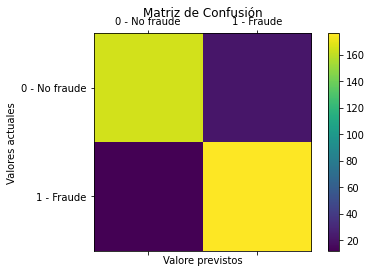



******* Curva ROC *********

AUC - Test Set: 90.93%


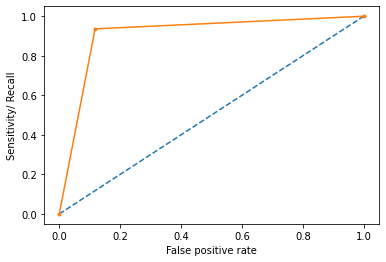



******* Métricas de Evaluación *********

Accuracy de entrenamiento: 0.8833333333333333
Accuracy de test: 0.9093333333333333
precision_score: 0.8888888888888888
recall_score: 0.9361702127659575
f1_score: 0.9119170984455959
cohen_kappa_score: 0.8186395835111376
AUC - Test Set: 90.93%
Media accuracyCrossValidation evaluado en 10 modelos:  0.874644437420986
Desviancion estandar accuracyCrossValidation evaluado en 10 modelos:  0.014223040883921142


In [ ]:
df_evaluacion = evaluacionMetricas(df_evaluacion, atributos_Boruta, 'atributos_Boruta','Regresion Logistica')

### Atributos atributos_RFE_30 - Regresión logística

Seleccionamos los atributos obtenidos en la selección de variables por el algoritmo atributos_RFE_30


******* Matriz de Confusión *********

[[165  22]
 [ 16 172]]


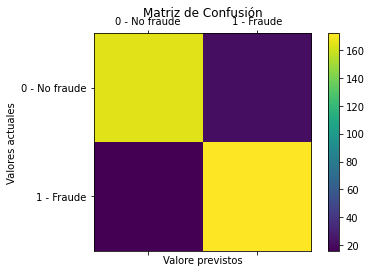



******* Curva ROC *********

AUC - Test Set: 89.86%


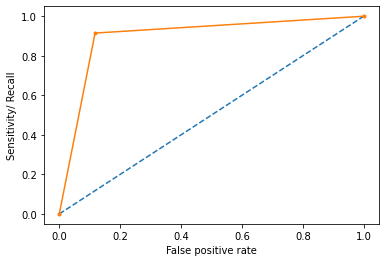



******* Métricas de Evaluación *********

Accuracy de entrenamiento: 0.888
Accuracy de test: 0.8986666666666666
precision_score: 0.8865979381443299
recall_score: 0.9148936170212766
f1_score: 0.900523560209424
cohen_kappa_score: 0.7973145961937814
AUC - Test Set: 89.86%
Media accuracyCrossValidation evaluado en 10 modelos:  0.8684181415929203
Desviancion estandar accuracyCrossValidation evaluado en 10 modelos:  0.01995619902264384


In [ ]:
df_evaluacion = evaluacionMetricas(df_evaluacion, atributos_RFE_30, 'atributos_RFE_30','Regresion Logistica')

### Atributos atributos_RFE_15 - Regresión logística

Seleccionamos los atributos obtenidos en la selección de variables por el algoritmo atributos_RFE_15


******* Matriz de Confusión *********

[[167  20]
 [ 18 170]]


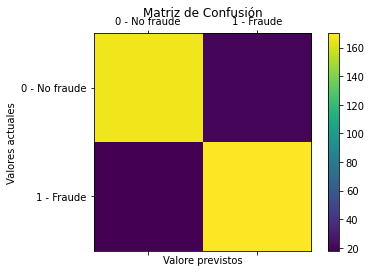



******* Curva ROC *********

AUC - Test Set: 89.87%


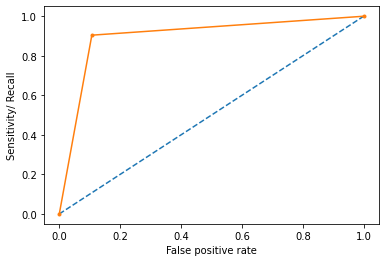



******* Métricas de Evaluación *********

Accuracy de entrenamiento: 0.872
Accuracy de test: 0.8986666666666666
precision_score: 0.8947368421052632
recall_score: 0.9042553191489362
f1_score: 0.8994708994708994
cohen_kappa_score: 0.7973261271511876
AUC - Test Set: 89.87%
Media accuracyCrossValidation evaluado en 10 modelos:  0.8631005056890014
Desviancion estandar accuracyCrossValidation evaluado en 10 modelos:  0.014002334347383833


In [ ]:
df_evaluacion = evaluacionMetricas(df_evaluacion, atributos_RFE_15, 'atributos_RFE_15','Regresion Logistica')

## 6.5.- Naive Bayes

In [ ]:
# Eliminamos del dataframe de metricas los registros de KNeighborsClassifier para cargarlos de nuevo
df_evaluacion = df_evaluacion[df_evaluacion["Algoritmo"] != "GaussianNB"]

### Atributos atributos_Boruta - Naive Bayes

Seleccionamos los atributos obtenidos en la selección de variables


******* Matriz de Confusión *********

[[173  14]
 [ 24 164]]


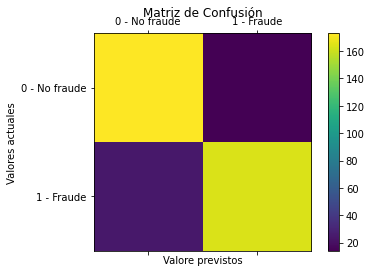



******* Curva ROC *********

AUC - Test Set: 89.87%


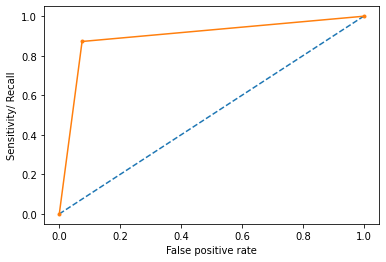



******* Métricas de Evaluación *********

Accuracy de entrenamiento: 0.8746666666666667
Accuracy de test: 0.8986666666666666
precision_score: 0.9213483146067416
recall_score: 0.8723404255319149
f1_score: 0.8961748633879781
cohen_kappa_score: 0.7973607121526691
AUC - Test Set: 89.87%
Media accuracyCrossValidation evaluado en 10 modelos:  0.8666482300884957
Desviancion estandar accuracyCrossValidation evaluado en 10 modelos:  0.029552173880495386


In [ ]:
df_evaluacion = evaluacionMetricas(df_evaluacion, atributos_Boruta, 'atributos_Boruta','GaussianNB')

### Atributos atributos_RFE_30 - GaussianNB

Seleccionamos los atributos obtenidos en la selección de variables


******* Matriz de Confusión *********

[[164  23]
 [ 22 166]]


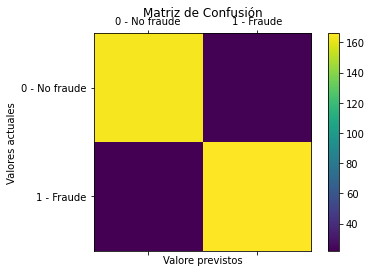



******* Curva ROC *********

AUC - Test Set: 88.00%


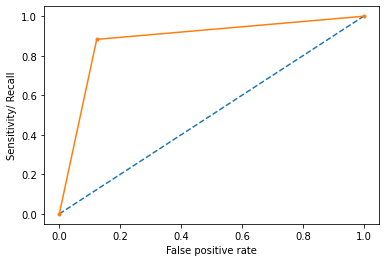



******* Métricas de Evaluación *********

Accuracy de entrenamiento: 0.8666666666666667
Accuracy de test: 0.88
precision_score: 0.8783068783068783
recall_score: 0.8829787234042553
f1_score: 0.8806366047745358
cohen_kappa_score: 0.759994879890771
AUC - Test Set: 88.00%
Media accuracyCrossValidation evaluado en 10 modelos:  0.8586915297092288
Desviancion estandar accuracyCrossValidation evaluado en 10 modelos:  0.026703198290719054


In [ ]:
df_evaluacion = evaluacionMetricas(df_evaluacion, atributos_RFE_30, 'atributos_RFE_30','GaussianNB')

## 6.6.- KNeighborsClassifier

In [ ]:
# Eliminamos del dataframe de metricas los registros de KNeighborsClassifier para cargarlos de nuevo
df_evaluacion = df_evaluacion[df_evaluacion["Algoritmo"] != "KNeighborsClassifier"]

### Atributos Boruta - KNeighborsClassifier

Seleccionamos los atributos obtenidos en la selección de variables


******* Matriz de Confusión *********

[[172  15]
 [ 33 155]]


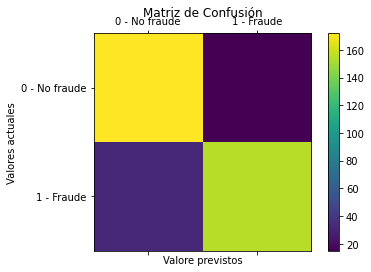



******* Curva ROC *********

AUC - Test Set: 87.21%


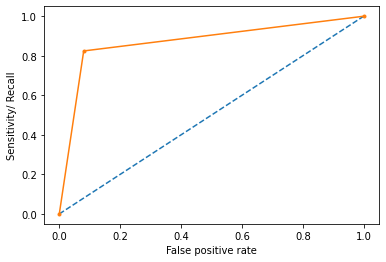



******* Métricas de Evaluación *********

Accuracy de entrenamiento: 0.8613333333333333
Accuracy de test: 0.872
precision_score: 0.9117647058823529
recall_score: 0.824468085106383
f1_score: 0.8659217877094971
cohen_kappa_score: 0.7440636997014076
AUC - Test Set: 87.21%
Media accuracyCrossValidation evaluado en 10 modelos:  0.8372866624525918
Desviancion estandar accuracyCrossValidation evaluado en 10 modelos:  0.025141426685463462


In [ ]:
df_evaluacion = evaluacionMetricas(df_evaluacion, atributos_Boruta, 'atributos_Boruta','KNeighborsClassifier')

### Atributos atributos_SelectKBest_8 - KNeighborsClassifier

Seleccionamos los atributos obtenidos en la selección de variables


******* Matriz de Confusión *********

[[165  22]
 [ 32 156]]


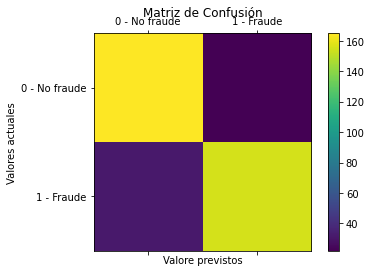



******* Curva ROC *********

AUC - Test Set: 85.61%


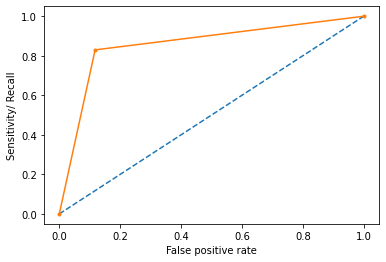



******* Métricas de Evaluación *********

Accuracy de entrenamiento: 0.8486666666666667
Accuracy de test: 0.856
precision_score: 0.8764044943820225
recall_score: 0.8297872340425532
f1_score: 0.8524590163934426
cohen_kappa_score: 0.7120389067432666
AUC - Test Set: 85.61%
Media accuracyCrossValidation evaluado en 10 modelos:  0.8355641592920353
Desviancion estandar accuracyCrossValidation evaluado en 10 modelos:  0.019457756429526213


In [ ]:
df_evaluacion = evaluacionMetricas(df_evaluacion, atributos_SelectKBest_8, 'atributos_SelectKBest_8','KNeighborsClassifier')

## 6.7.- Xgboost

In [ ]:
# Eliminamos del dataframe de metricas los registros de Xgboost para cargarlos de nuevo
df_evaluacion = df_evaluacion[df_evaluacion["Algoritmo"] != "XgBoost"]

### Atributos Boruta - XgBoost

Seleccionamos los atributos obtenidos en la selección de variables


******* Matriz de Confusión *********

[[169  18]
 [ 17 171]]


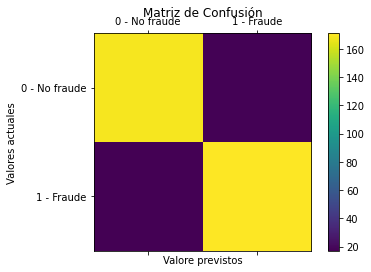



******* Curva ROC *********

AUC - Test Set: 90.67%


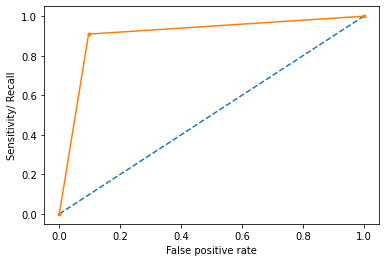



******* Métricas de Evaluación *********

Accuracy de entrenamiento: 0.8953333333333333
Accuracy de test: 0.9066666666666666
precision_score: 0.9047619047619048
recall_score: 0.9095744680851063
f1_score: 0.907161803713528
cohen_kappa_score: 0.8133293510261552
AUC - Test Set: 90.67%
Media accuracyCrossValidation evaluado en 10 modelos:  0.8701959544879898
Desviancion estandar accuracyCrossValidation evaluado en 10 modelos:  0.01715936840039625


In [ ]:
df_evaluacion = evaluacionMetricas(df_evaluacion, atributos_Boruta, 'atributos_Boruta','XgBoost')

### Atributos atributos_SelectKBest_30 - XgBoost

Seleccionamos los atributos obtenidos en la selección de variables


******* Matriz de Confusión *********

[[171  16]
 [ 24 164]]


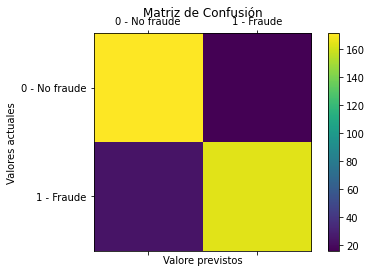



******* Curva ROC *********

AUC - Test Set: 89.34%


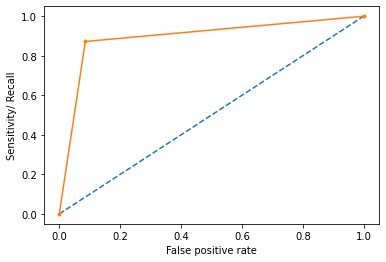



******* Métricas de Evaluación *********

Accuracy de entrenamiento: 0.898
Accuracy de test: 0.8933333333333333
precision_score: 0.9111111111111111
recall_score: 0.8723404255319149
f1_score: 0.891304347826087
cohen_kappa_score: 0.7866894197952219
AUC - Test Set: 89.34%
Media accuracyCrossValidation evaluado en 10 modelos:  0.8640012642225031
Desviancion estandar accuracyCrossValidation evaluado en 10 modelos:  0.02352558092071984


In [ ]:
df_evaluacion = evaluacionMetricas(df_evaluacion, atributos_SelectKBest_30, 'atributos_SelectKBest_30','XgBoost')

## 6.8.- RandomForest

In [ ]:
# Eliminamos del dataframe de metricas los registros de RandomForest para cargarlos de nuevo
df_evaluacion = df_evaluacion[df_evaluacion["Algoritmo"] != "RandomForest"]

### Atributos Boruta - RandomForest

Seleccionamos los atributos obtenidos en la selección de variables


******* Matriz de Confusión *********

[[155  35]
 [ 23 162]]


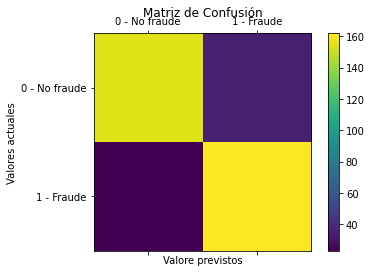



******* Curva ROC *********

AUC - Test Set: 84.57%


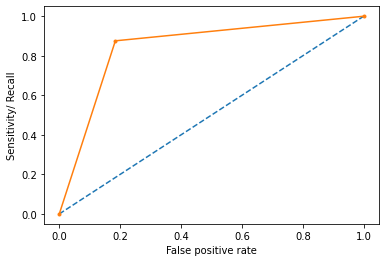



******* Métricas de Evaluación *********

Accuracy de entrenamiento: 0.87
Accuracy de test: 0.8453333333333334
precision_score: 0.8223350253807107
recall_score: 0.8756756756756757
f1_score: 0.8481675392670158
cohen_kappa_score: 0.6908754974417283
AUC - Test Set: 84.57%
Media accuracyCrossValidation evaluado en 10 modelos:  0.8693347029077116
Desviancion estandar accuracyCrossValidation evaluado en 10 modelos:  0.022066677243950814


In [ ]:
df_evaluacion = evaluacionMetricas(df_evaluacion, atributos_Boruta, 'atributos_Boruta','RandomForest')

### Atributos atributos_SelectFromModel - RandomForest

Seleccionamos los atributos obtenidos en la selección de variables


******* Matriz de Confusión *********

[[157  33]
 [ 27 158]]


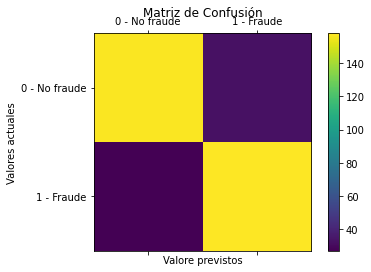



******* Curva ROC *********

AUC - Test Set: 84.02%


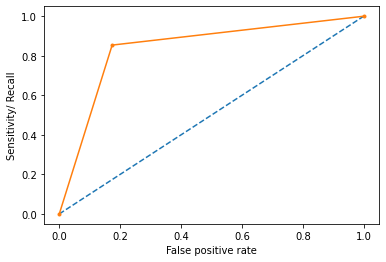



******* Métricas de Evaluación *********

Accuracy de entrenamiento: 0.85
Accuracy de test: 0.84
precision_score: 0.8272251308900523
recall_score: 0.8540540540540541
f1_score: 0.8404255319148937
cohen_kappa_score: 0.6800796246267595
AUC - Test Set: 84.02%
Media accuracyCrossValidation evaluado en 10 modelos:  0.8524573324905184
Desviancion estandar accuracyCrossValidation evaluado en 10 modelos:  0.025362775973198196


In [ ]:
df_evaluacion = evaluacionMetricas(df_evaluacion, atributos_SelectFromModel, 'atributos_SelectFromModel','RandomForest')

## 6.9.- Resumen de Mejores Métricas de Evaluación

A continuación se presenta un resumen de los **5 mejores** resultados de las métricas de evaluación de los distintos algoritmos y conjuntos de atributos:

In [ ]:
df_evaluacion.sort_values(by=['Accuracy_Test', 
                              'Recall_score', 
                              'f1_score', 
                              'cohen_kappa_score', 
                              'AUC_ROC'],ascending=False).head().loc[:, ['Algoritmo',
                                                                         'Conjunto_de_Atributos',
                                                                         'Accuracy_Test',
                                                                         'Precision_score',
                                                                         'Recall_score',
                                                                         'f1_score',
                                                                         'cohen_kappa_score',
                                                                         'AUC_ROC']]

Algoritmo Conjunto_de_Atributos  Accuracy_Test  Precision_score  \
20  Regresion Logistica      atributos_Boruta       0.909333         0.888889   
50              XgBoost      atributos_Boruta       0.906667         0.904762   
27  Regresion Logistica      atributos_RFE_30       0.898667         0.886598   
28  Regresion Logistica      atributos_RFE_15       0.898667         0.894737   
30           GaussianNB      atributos_Boruta       0.898667         0.921348   

    Recall_score  f1_score  cohen_kappa_score   AUC_ROC  
20      0.936170  0.911917           0.818640  0.909262  
50      0.909574  0.907162           0.813329  0.906659  
27      0.914894  0.900524           0.797315  0.898623  
28      0.904255  0.899471           0.797326  0.898652  
30      0.872340  0.896175           0.797361  0.898737

Según las métricas revisadas, el mejor modelo obtenido es el realizado con **Regresión Logística** y los atributos obtenidos con el algoritmo de **Boruta**.

## 6.10.- Exportación del Modelo

A continuación se presenta el mejor modelo obtenido con sus respectivas métricas, el cual será exportado para ser utilizado para las finalidades que se estimen conveniente:

In [ ]:
df_evaluacion.sort_values(by=['Accuracy_Test', 'Recall_score', 'f1_score', 'cohen_kappa_score', 'AUC_ROC'],ascending=False).iloc[0]

Algoritmo                                      Regresion Logistica
Conjunto_de_Atributos                             atributos_Boruta
Accuracy_Entrenamiento                                    0.883333
Accuracy_Test                                             0.909333
Precision_score                                           0.888889
Recall_score                                               0.93617
f1_score                                                  0.911917
cohen_kappa_score                                          0.81864
AUC_ROC                                                   0.909262
accuracyCrossValidation_mean                              0.874644
accuracyCrossValidation_std                               0.014223
modelo                          LogisticRegression(penalty='none')
Name: 20, dtype: object

In [ ]:
# Guardamos el mejor modelo obtenido

import joblib

model = df_evaluacion.sort_values(by=['Accuracy_Test', 'Recall_score', 'f1_score', 'cohen_kappa_score', 'AUC_ROC'],ascending=False).iloc[0]["modelo"]
joblib.dump(model, 'Modelo_Entrenado_TFM_Seguros.pkl') # Guardo el modelo.

['Modelo_Entrenado_TFM_Seguros.pkl']

In [ ]:
# Instrucción para cargar el modelo
# model = joblib.load('Modelo_Entrenado_TFM_Seguros.pkl') # Carga del modelo.